In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# importation de toutes les librairies utiles
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library based on matplotlib
import matplotlib.pyplot as plt # Python 2D plotting library which produces publication quality figures
import random # importation de la librairie permettant de générer un nombre aléatoire

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fifa-20-complete-player-dataset/players_16.csv
/kaggle/input/fifa-20-complete-player-dataset/players_17.csv
/kaggle/input/fifa-20-complete-player-dataset/players_18.csv
/kaggle/input/fifa-20-complete-player-dataset/teams_and_leagues.csv
/kaggle/input/fifa-20-complete-player-dataset/players_20.csv
/kaggle/input/fifa-20-complete-player-dataset/players_19.csv
/kaggle/input/fifa-20-complete-player-dataset/players_15.csv


In [44]:
# lecture des 4 fichiers de données [FIFA 17;FIFA 18;FIFA 19;FIFA20]
data_fifa17 = pd.read_csv("../input/fifa-20-complete-player-dataset/players_17.csv")
data_fifa18 = pd.read_csv("../input/fifa-20-complete-player-dataset/players_18.csv")
data_fifa19 = pd.read_csv("../input/fifa-20-complete-player-dataset/players_19.csv")
data_fifa20 = pd.read_csv("../input/fifa-20-complete-player-dataset/players_20.csv")

In [45]:
 # affichage de toutes les colonnes
data_fifa17.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [46]:
# affichage de la moyenne, l'écart type, min, les quantiles, le max de chaque colonne
data_fifa20.describe()
# on observe par exemple que l'age moyen d'un joueur est de 25 ans, le min de 16 ans et que 75% ont 29 ans
# on voit aussi que le poids moyen d'un joueur est de 75 kg, le min de 50 kg ans et que 75% ont 80 k
# on voit aussi que la taille moyenne d'un joueur est de  181 cm, le min de 156 cm ans et que 75% ont 186 cm
# Avec cette fonction describe on dispose d'un premier apercu des diférentes colonnes présentes et on peut ainsi tirer les premiers enseignements

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


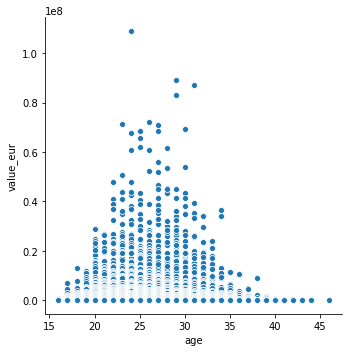

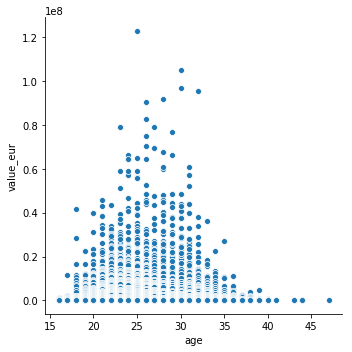

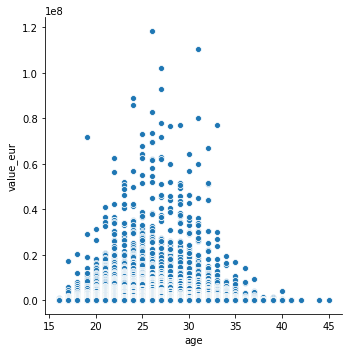

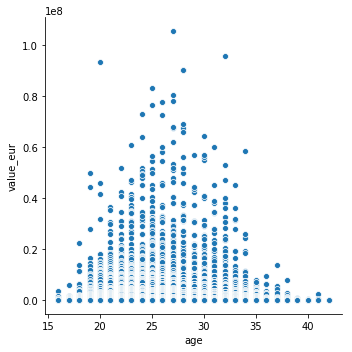

In [47]:
# on trace les courbes pour chaque échantillon de données en comparant l'age par rapport à la valeur monnetaire du joueur 
sns.relplot(x='age', y='value_eur', data=data_fifa17)
sns.relplot(x='age', y='value_eur', data=data_fifa18)
sns.relplot(x='age', y='value_eur', data=data_fifa19)
sns.relplot(x='age', y='value_eur', data=data_fifa20)

# On constate que plus le joueur est proche des 25 ans plus sa valeur est élèvée. On observe ce phénomène dans les 4 graphiques ci-dessous 

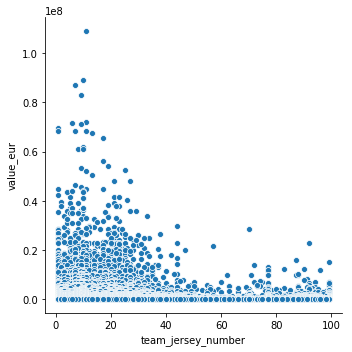

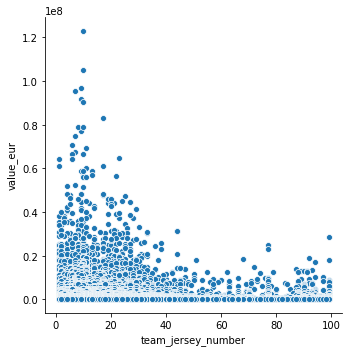

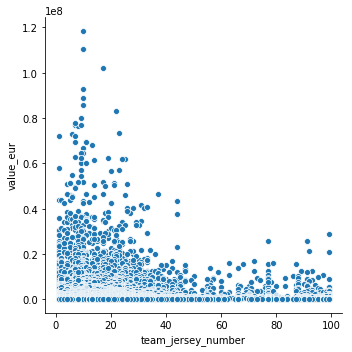

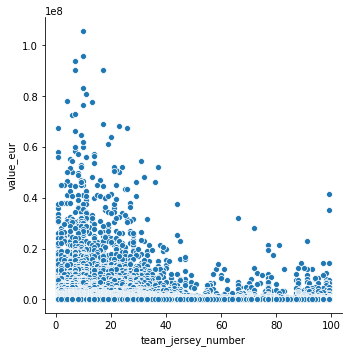

In [48]:
# On trace les nuages de points en comparant la valeur du joueur par rapport à son numero de maillot
sns.relplot(x='team_jersey_number', y='value_eur', data=data_fifa17)
sns.relplot(x='team_jersey_number', y='value_eur', data=data_fifa18)
sns.relplot(x='team_jersey_number', y='value_eur', data=data_fifa19)
sns.relplot(x='team_jersey_number', y='value_eur', data=data_fifa20)
# on constate que plus les joueurs sont proches du numéro 10 plus ils sont chères

In [92]:
# option pour afficher toutes les colonnes
pd.set_option('display.max_rows', None)
# affichage de 20 clubs de Fifa 20
data_fifa17["club"].head(20)

0             Real Madrid
1            FC Barcelona
2            FC Barcelona
3       FC Bayern München
4            FC Barcelona
5       Manchester United
6       Manchester United
7             Real Madrid
8       FC Bayern München
9       FC Bayern München
10                Chelsea
11                Arsenal
12        Manchester City
13            Real Madrid
14    Paris Saint-Germain
15            Real Madrid
16      Manchester United
17        Atlético Madrid
18        Manchester City
19            Real Madrid
Name: club, dtype: object

In [50]:
# affichage du nombre de club dans Fifa 20
print(data_fifa17["club"].count())

17009


In [51]:
# affichage de tous les joueurs du FC Barcelone de Fifa 17
data_fifa17[data_fifa17['club'] == 'FC Barcelona']

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4
33,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,27,1988-07-16,189,76,Spain,FC Barcelona,...,78+3,85+3,85+3,85+3,78+3,77+3,81+3,81+3,81+3,77+3
39,168651,https://sofifa.com/player/168651/ivan-rakitic/...,I. Rakitić,Ivan Rakitić,28,1988-03-10,184,78,Croatia,FC Barcelona,...,73+3,75+3,75+3,75+3,73+3,69+3,64+3,64+3,64+3,69+3
47,189332,https://sofifa.com/player/189332/jordi-alba-ra...,Jordi Alba,Jordi Alba Ramos,27,1989-03-21,170,68,Spain,FC Barcelona,...,85+2,80+2,80+2,80+2,85+2,84+2,79+2,79+2,79+2,84+2
51,152729,https://sofifa.com/player/152729/gerard-pique-...,Piqué,Gerard Piqué Bernabéu,29,1987-02-02,193,85,Spain,FC Barcelona,...,76+3,81+3,81+3,81+3,76+3,78+3,83+3,83+3,83+3,78+3
69,142754,https://sofifa.com/player/142754/javier-masche...,J. Mascherano,Javier Alejandro Mascherano,32,1984-06-08,174,73,Argentina,FC Barcelona,...,80+3,83+3,83+3,83+3,80+3,81+3,83+3,83+3,83+3,81+3
86,211575,https://sofifa.com/player/211575/andre-filipe-...,André Gomes,André Filipe Tavares Gomes,22,1993-07-30,188,84,Portugal,FC Barcelona,...,75+2,80+2,80+2,80+2,75+2,74+2,75+2,75+2,75+2,74+2
113,143745,https://sofifa.com/player/143745/arda-turan/17...,A. Turan,Arda Turan,29,1987-01-30,177,76,Turkey,FC Barcelona,...,74+2,74+2,74+2,74+2,74+2,72+2,68+2,68+2,68+2,72+2


In [52]:
# affichage de tous les joueurs de Marseille de Fifa 20
data_fifa20[data_fifa20['club'] == 'Olympique de Marseille']

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
198,204970,https://sofifa.com/player/204970/florian-thauv...,F. Thauvin,Florian Thauvin,26,1993-01-26,179,70,France,Olympique de Marseille,...,65+2,62+2,62+2,62+2,65+2,61+2,53+2,53+2,53+2,61+2
384,177388,https://sofifa.com/player/177388/dimitri-payet...,D. Payet,Dimitri Payet,32,1987-03-29,175,77,France,Olympique de Marseille,...,61+3,60+3,60+3,60+3,61+3,57+3,50+3,50+3,50+3,57+3
394,185221,https://sofifa.com/player/185221/luiz-gustavo-...,Luiz Gustavo,Luiz Gustavo Dias,31,1987-07-23,187,78,Brazil,Olympique de Marseille,...,75+3,79+3,79+3,79+3,75+3,76+3,79+3,79+3,79+3,76+3
500,163705,https://sofifa.com/player/163705/steve-mandand...,S. Mandanda,Steve Mandanda,34,1985-03-28,185,80,France,Olympique de Marseille,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,189712,https://sofifa.com/player/189712/kevin-strootm...,K. Strootman,Kevin Strootman,29,1990-02-13,186,80,Netherlands,Olympique de Marseille,...,75+3,80+3,80+3,80+3,75+3,75+3,77+3,77+3,77+3,75+3
619,210896,https://sofifa.com/player/210896/morgan-sanson...,M. Sanson,Morgan Sanson,24,1994-08-18,180,73,France,Olympique de Marseille,...,74+2,75+2,75+2,75+2,74+2,74+2,71+2,71+2,71+2,74+2
737,215061,https://sofifa.com/player/215061/dario-benedet...,D. Benedetto,Darío Benedetto,29,1990-05-17,177,80,Argentina,Olympique de Marseille,...,55+2,55+2,55+2,55+2,55+2,53+2,52+2,52+2,52+2,53+2
961,202935,https://sofifa.com/player/202935/alvaro-gonzal...,Álvaro,Álvaro González Soberón,29,1990-01-08,183,75,Spain,Olympique de Marseille,...,70+2,71+2,71+2,71+2,70+2,72+2,76+2,76+2,76+2,72+2
970,208520,https://sofifa.com/player/208520/hiroki-sakai/...,H. Sakai,酒井 宏樹,29,1990-04-12,183,70,Japan,Olympique de Marseille,...,76+2,74+2,74+2,74+2,76+2,76+2,75+2,75+2,75+2,76+2
1036,224030,https://sofifa.com/player/224030/maxime-lopez/...,M. Lopez,Maxime Lopez,21,1997-12-04,167,58,France,Olympique de Marseille,...,71+2,71+2,71+2,71+2,71+2,69+2,65+2,65+2,65+2,69+2


In [53]:
#recuperation du top 10 des clubs qui payent le mieux leurs joueurs
data_fifa17_top10_club = data_fifa17[((data_fifa17['club'] == 'Liverpool') | (data_fifa17['club'] == 'Chelsea') | (data_fifa17['club'] == 'Arsenal')| (data_fifa17['club'] == 'Paris Saint-Germain') |  (data_fifa17['club'] == 'Manchester City') | (data_fifa17['club'] == 'FC Bayern München') |  (data_fifa17['club'] == ' Manchester United') | (data_fifa17['club'] == 'FC Barcelona') | (data_fifa17['club'] == 'Real Madrid') |(data_fifa17['club'] == 'Tottenham Hotspur') ) ]

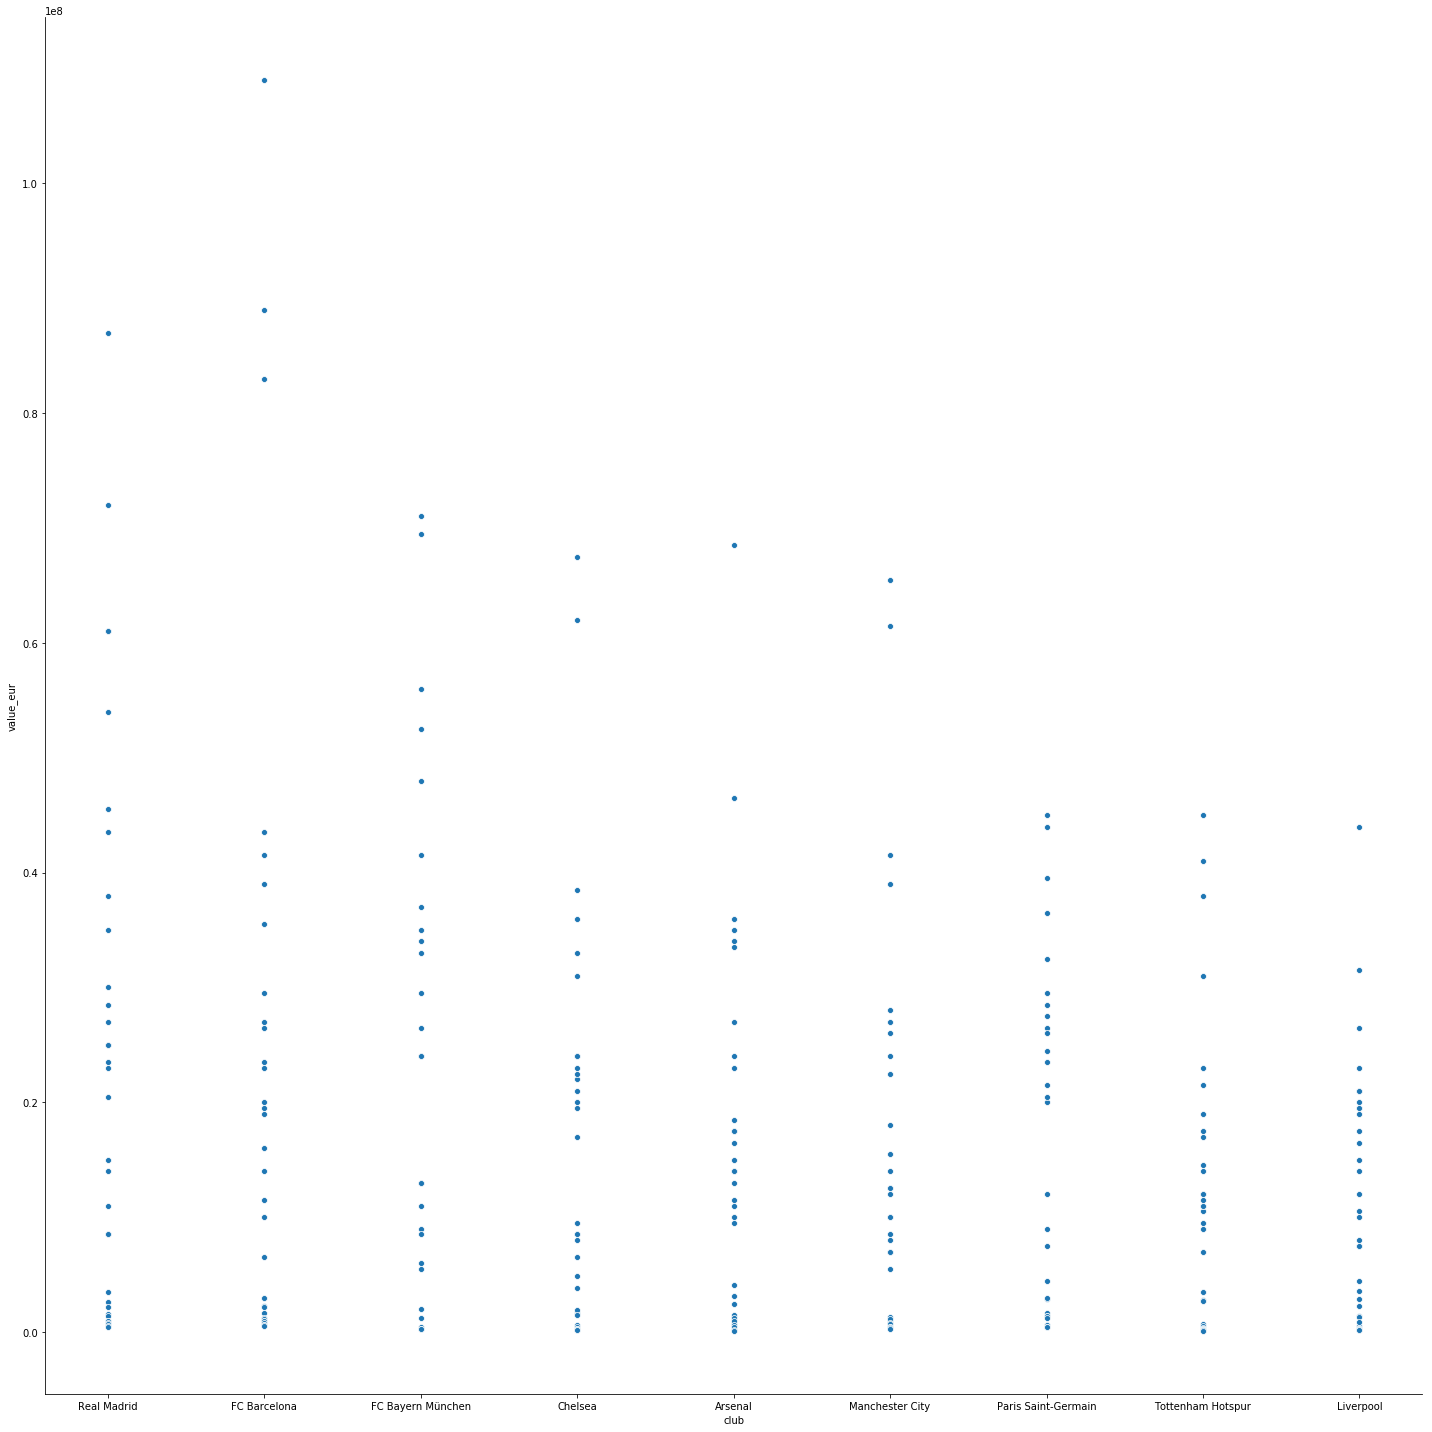

In [54]:
# on trace le nuage de points des clubs par rapport  à la valeur euros
sns.relplot(x='club', y='value_eur', data=data_fifa17_top10_club,height = 20)
# on observe que parmi les 10 clubs les plus riches on voit que c'est le FC Barcelone et le Real Madrid qui payent le plus ses joueurs

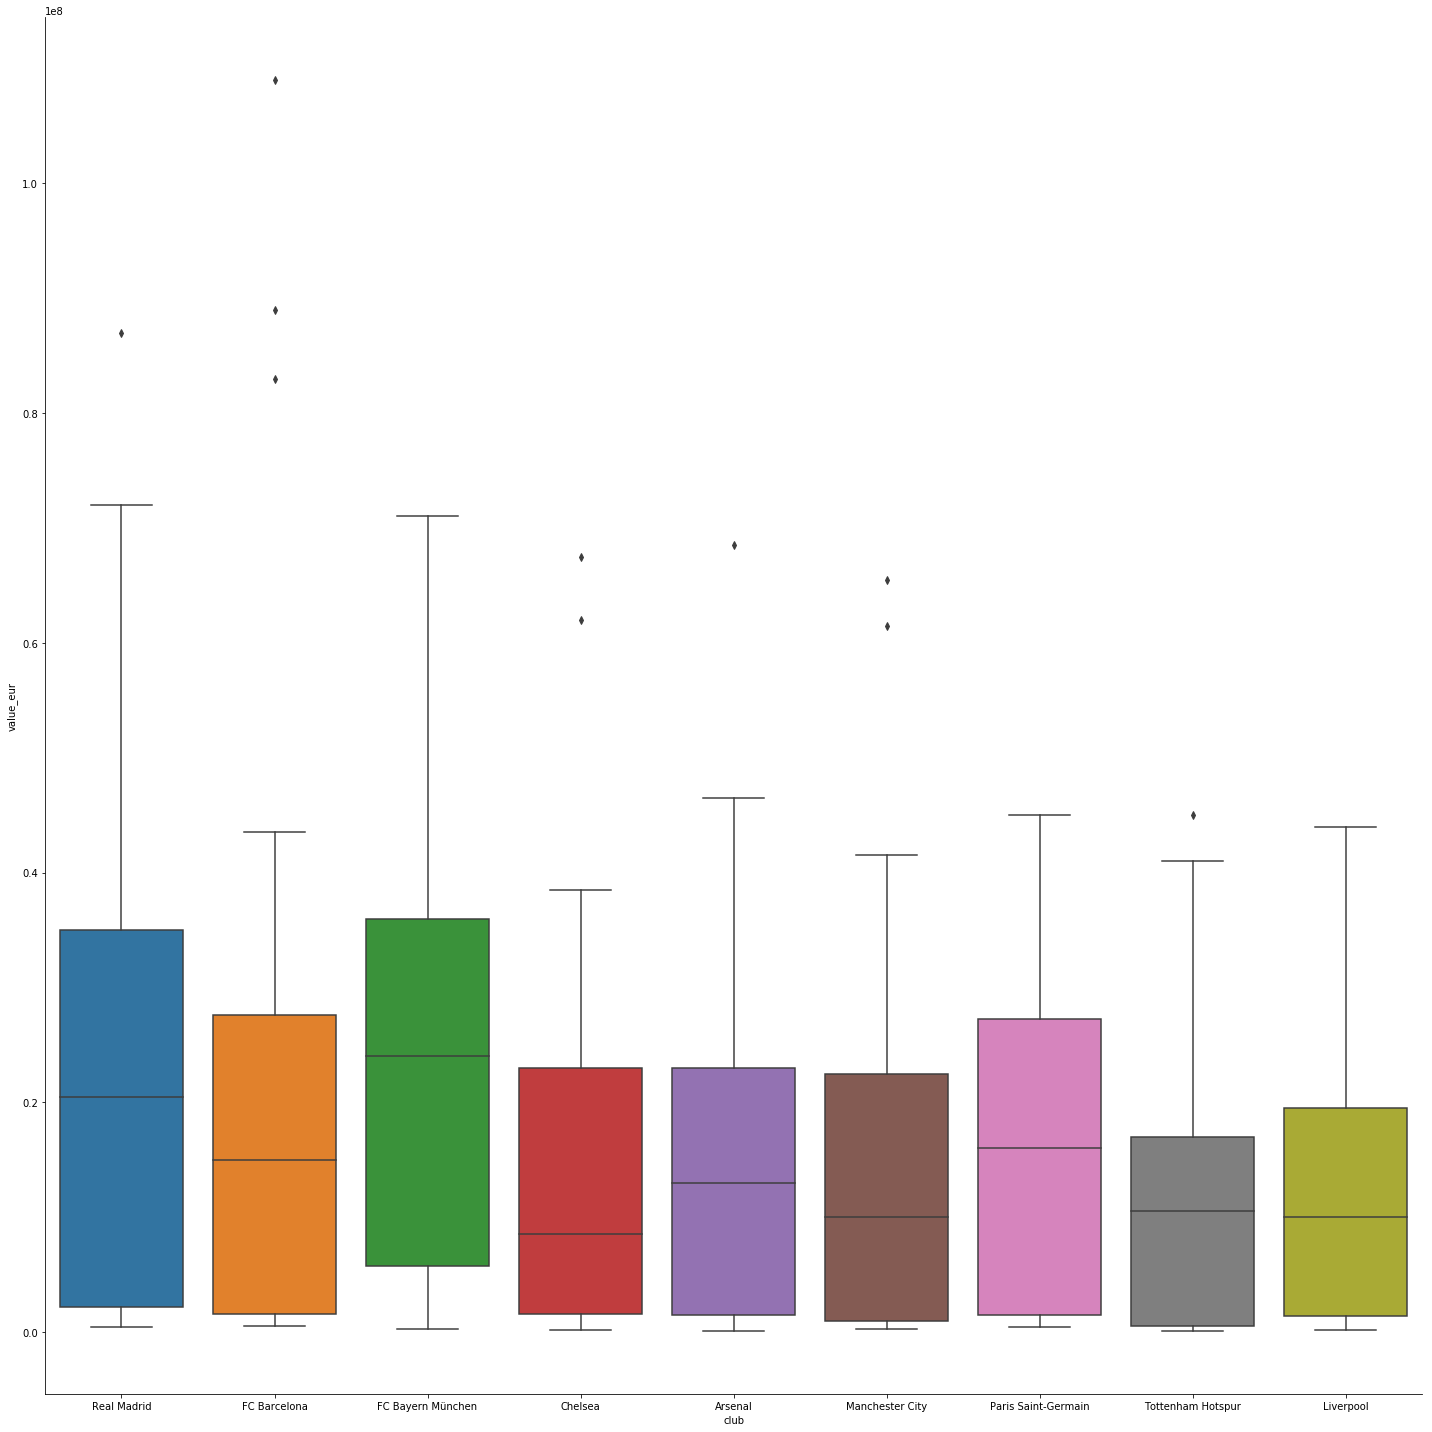

In [55]:
# on trace les boites à moustaches des clubs par rapport toujours à la valeur euros
sns.catplot(x='club', y='value_eur', data=data_fifa17_top10_club,height = 20,kind="box")
# Avec les boites à moustaches on constate que c'est le bayern de munich qui paye en moyenne le mieux ses joueurs. 
# Les valeurs aberrantes que l'on observe par exemple pour le FC Barcelone doivent être les valeurs de Messi ,Neymar,Suarez qui possèdent un salaire astronomique

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32d1673940>,
      dtype=object)

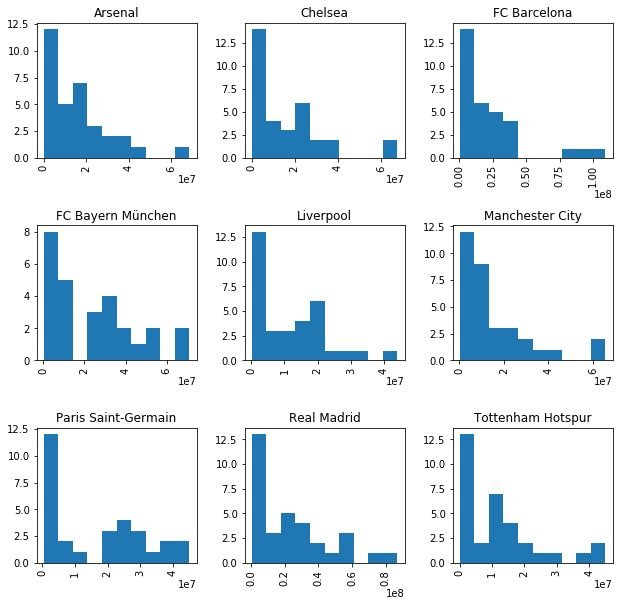

In [56]:
# on trace des histogrammes  des clubs par rapport à la valeur euros
data_fifa17_top10_club.hist(column="value_eur", by="club",figsize=(10,10))

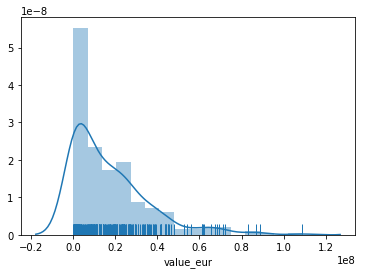

In [57]:
# on trace le graphique représentant la ditribution de la variable valeur_eur
sns.distplot(data_fifa17_top10_club['value_eur'], kde=True, rug=True);

In [58]:
# selection de 10 nationalités
data_fifa17_top10_nationality = data_fifa17[((data_fifa17['nationality'] == 'Portugal') | (data_fifa17['nationality'] == 'Argentina') | (data_fifa17['nationality'] == 'Brazil')| (data_fifa17['nationality'] == 'Spain') |  (data_fifa17['nationality'] == 'France') | (data_fifa17['nationality'] == 'Germany') |  (data_fifa17['nationality'] == 'Netherlands') | (data_fifa17['nationality'] == 'Algeria') | (data_fifa17['nationality'] == 'Turkey') |(data_fifa17['nationality'] == 'Cameroon') ) ]
#affichage des 10 premières lignes
data_fifa17_top10_nationality.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,25,1990-11-07,193,82,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,183907,https://sofifa.com/player/183907/jerome-boaten...,J. Boateng,Jérôme Boateng,27,1988-09-03,192,90,Germany,FC Bayern München,...,81+3,83+3,83+3,83+3,81+3,83+3,88+3,88+3,88+3,83+3
11,176635,https://sofifa.com/player/176635/mesut-ozil/17...,M. Özil,Mesut Özil,27,1988-10-15,183,76,Germany,Arsenal,...,58+3,57+3,57+3,57+3,58+3,52+3,41+3,41+3,41+3,52+3
12,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,28,1988-06-02,172,74,Argentina,Manchester City,...,57+3,54+3,54+3,54+3,57+3,53+3,44+3,44+3,44+3,53+3
13,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,30,1986-03-30,183,75,Spain,Real Madrid,...,81+3,82+3,82+3,82+3,81+3,83+3,86+3,86+3,86+3,83+3
14,164240,https://sofifa.com/player/164240/thiago-emilia...,Thiago Silva,Thiago Emiliano da Silva,31,1984-09-22,183,79,Brazil,Paris Saint-Germain,...,81+3,84+3,84+3,84+3,81+3,82+3,87+3,87+3,87+3,82+3


In [59]:
# fusion de 2 échantillons de données 2017 et 2020 avec comme élementde jointure l'attribut sofifa_id
all_data_fifa =  pd.merge(data_fifa17, data_fifa20, on=["sofifa_id"])

In [60]:
#all_data_fifa

In [61]:
# filtre pour récupérer les statistiques de Messi
all_data_fifa_messi = all_data_fifa[all_data_fifa['short_name_x']=='L. Messi']

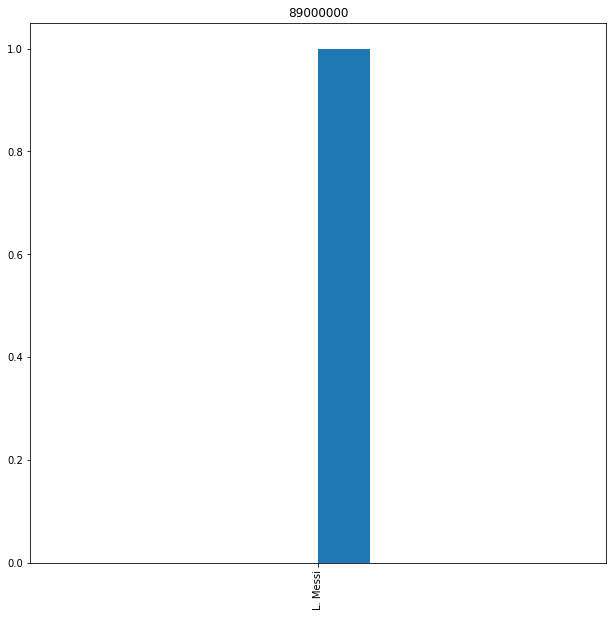

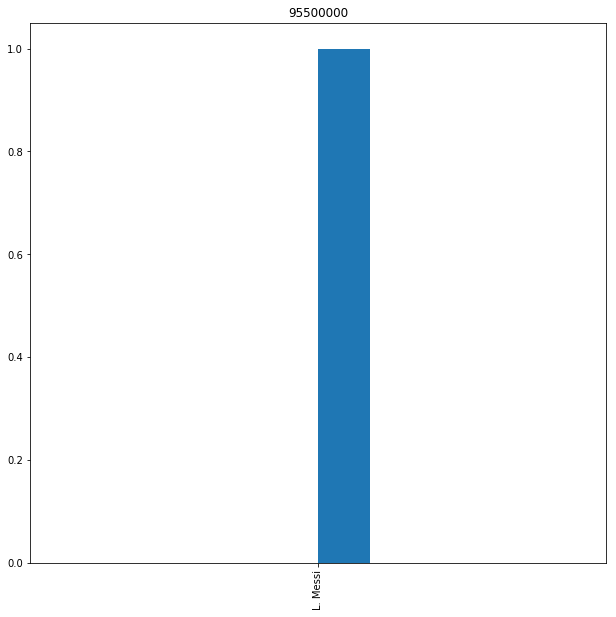

In [62]:
# on trace 1 histogramme pour comparer Messi à son salaire en 2017 (variable : valeur_eur_x)
all_data_fifa_messi.hist(column="short_name_x", by="value_eur_x",figsize=(10,10))
# on trace 1 histogramme pour comparer Messi à son salaire en 2020 (variable : valeur_eur_y)
all_data_fifa_messi.hist(column="short_name_y", by="value_eur_y",figsize=(10,10))
# on constate que la valeur de Messi a augmenté entre 2017 et 2020 avec 6 500 00 d'euros en plus en 4 ans 

In [63]:
# on merge les 4 tableaux de données de fifa 17 à fifa 20
# on fusionne les deux tables Fifa17 et Fifa18 en leur donnant des suffixes pour les différencier et avec comme attribut commun sofifa 
all_data_fifa17_to_fifa18 = data_fifa17.merge(data_fifa18 ,on='sofifa_id',suffixes=('_fifa17', '_fifa18'))
# on fusionne les deux tables : Fifa19 et Fifa20 en leur donnant des suffixes pour les différencier
all_data_fifa19_to_fifa20 = data_fifa19.merge(data_fifa20 ,on='sofifa_id',suffixes=('_fifa19', '_fifa20'))
# on fusione les 2 tables "all_data_fifa17_to_fifa18 " et "all_data_fifa19_to_fifa20" pour disposer de la totalité des données
all_data_fifa_merged=all_data_fifa17_to_fifa18.merge(all_data_fifa19_to_fifa20,on='sofifa_id') 
#all_data_fifa_merged

In [64]:
# génération d'un nombre entre 1 et 100
seed = random.randint(1,100)
# création d'un échantillon de 10 joueurs au hasard
echantillon = all_data_fifa_merged.sample(n=10, random_state=seed,replace=True)
echantillon

,sofifa_id,player_url_fifa17,short_name_fifa17,long_name_fifa17,age_fifa17,dob_fifa17,height_cm_fifa17,weight_kg_fifa17,nationality_fifa17,club_fifa17,...,lwb_fifa20,ldm_fifa20,cdm_fifa20,rdm_fifa20,rwb_fifa20,lb_fifa20,lcb_fifa20,cb_fifa20,rcb_fifa20,rb_fifa20
1289,190824,https://sofifa.com/player/190824/omar-elabdell...,O. Elabdellaoui,Omar Elabdellaoui,24,1991-12-05,179,73,Norway,Olympiacos CFP,...,74+2,71+2,71+2,71+2,74+2,73+2,69+2,69+2,69+2,73+2
7293,194759,https://sofifa.com/player/194759/omar-beckles/...,O. Beckles,Omar Beckles,24,1991-10-25,191,78,England,Accrington Stanley,...,61+2,60+2,60+2,60+2,61+2,62+2,64+2,64+2,64+2,62+2
4623,215374,https://sofifa.com/player/215374/scott-hogan/1...,S. Hogan,Scott Hogan,24,1992-04-13,180,64,England,Brentford,...,49+2,45+2,45+2,45+2,49+2,47+2,42+2,42+2,42+2,47+2
1344,200754,https://sofifa.com/player/200754/tolga-cigerci...,T. Ciğerci,Tolga Ciğerci,24,1992-03-23,185,80,Turkey,Galatasaray SK,...,69+2,70+2,70+2,70+2,69+2,69+2,70+2,70+2,70+2,69+2
3441,177912,https://sofifa.com/player/177912/magnus-lekven...,M. Lekven,Magnus Lekven,28,1988-01-13,177,72,Norway,Vålerenga Fotball,...,61+2,63+2,63+2,63+2,61+2,59+2,59+2,59+2,59+2,59+2
7291,232928,https://sofifa.com/player/232928/yoshiki-matsu...,Y. Matsushita,松下 佳貴,22,1994-03-03,174,63,Japan,Vissel Kobe,...,56+2,53+2,53+2,53+2,56+2,54+2,48+2,48+2,48+2,54+2
1180,165769,https://sofifa.com/player/165769/cassio-albuqu...,Cássio,Cássio Albuquerque dos Anjos,35,1980-08-12,186,79,Brazil,Rio Ave FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,200110,https://sofifa.com/player/200110/marco-bizot/1...,M. Bizot,Marco Bizot,25,1991-03-10,193,85,Netherlands,KRC Genk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4829,193358,https://sofifa.com/player/193358/romario-perei...,Romário,Romário Pereira Sipião,30,1985-08-10,173,72,Brazil,Kalmar FF,...,58+2,56+2,56+2,56+2,58+2,55+2,46+2,46+2,46+2,55+2
1520,192242,https://sofifa.com/player/192242/paul-lasne/17...,P. Lasne,Paul Lasne,27,1989-01-16,186,77,France,Montpellier HSC,...,72+2,74+2,74+2,74+2,72+2,71+2,72+2,72+2,72+2,71+2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32d20295c0>,
      dtype=object)

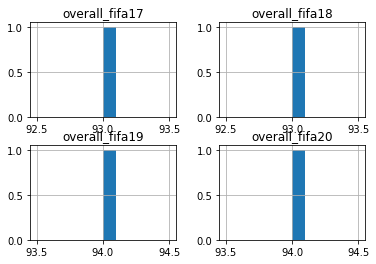

In [65]:
# on recupere toutes les statistiques de Messi pour les jeux Fifa17,18,19,20
all_data_fifa_messi = all_data_fifa_merged[all_data_fifa_merged['short_name_fifa17']=='L. Messi']
all_data_fifa_messi
# on trace les 4 histogrammes representant l'évolution de la note générale "overall" de Messi pour fifa17,18,19,20
all_data_fifa_messi.hist(column=["overall_fifa17", "overall_fifa18","overall_fifa19","overall_fifa20"])
# on observe que la note générale de Messi de 2017 à 2020 est passé de 93 à 94. On peut ainsi dire qu'il a porgressé.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32d2426a90>,
      dtype=object)

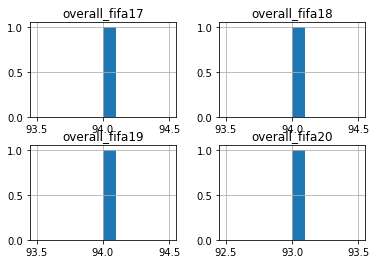

In [66]:
# on recupere toutes les statistiques de Ronaldo pour les jeux Fifa17,18,19,20
all_data_fifa_ronaldo = all_data_fifa_merged[all_data_fifa_merged['short_name_fifa17']=='Cristiano Ronaldo']
all_data_fifa_ronaldo
# on trace les 4 histogrammes representant l'évolution de la note générale "overall" de Ronaldo pour fifa17,18,19,20
all_data_fifa_ronaldo.hist(column=["overall_fifa17", "overall_fifa18","overall_fifa19","overall_fifa20"])
# Contrairement à Messi la note générale de Ronaldo est passé de 94 à 93. Donc ses statistiques générales ont dimuné

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32d3e0a780>,
      dtype=object)

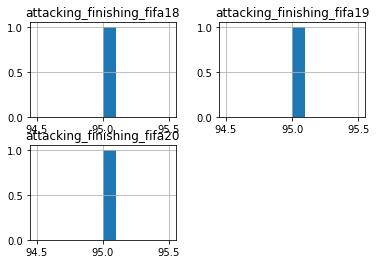

In [67]:
# on trace les 4 histogrammes representant l'évolution de la finition en attaque de Messi "overall" de Messi pour fifa18,19,20
#all_data_fifa_messi.astype({'attacking_finishing_fifa17': 'int64'}).dtypes
all_data_fifa_messi['attacking_finishing_fifa18'] = all_data_fifa_messi.attacking_finishing_fifa18.astype(int)
all_data_fifa_messi['attacking_finishing_fifa19'] = all_data_fifa_messi.attacking_finishing_fifa19.astype(int)
all_data_fifa_messi['attacking_finishing_fifa20'] = all_data_fifa_messi.attacking_finishing_fifa20.astype(int)
all_data_fifa_messi.hist(column=["attacking_finishing_fifa18","attacking_finishing_fifa19","attacking_finishing_fifa20"])
# Pour Messi on constate que sa finition devant les buts est restée constante avec une valeur de 95 sur 99

In [68]:
# on trie les jouerus par "overall" et on sélectionne les 10 meilleurs joueurs de Fifa 20 
top10_joueurs_fifa20 = all_data_fifa_merged.sort_values('overall_fifa20',ascending = False).head(10)
top10_joueurs_fifa20

,sofifa_id,player_url_fifa17,short_name_fifa17,long_name_fifa17,age_fifa17,dob_fifa17,height_cm_fifa17,weight_kg_fifa17,nationality_fifa17,club_fifa17,...,lwb_fifa20,ldm_fifa20,cdm_fifa20,rdm_fifa20,rwb_fifa20,lb_fifa20,lcb_fifa20,cb_fifa20,rcb_fifa20,rb_fifa20
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
29,200389,https://sofifa.com/player/200389/jan-oblak/17/...,J. Oblak,Jan Oblak,23,1993-01-07,186,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,183277,https://sofifa.com/player/183277/eden-hazard/1...,E. Hazard,Eden Hazard,25,1991-01-07,173,74,Belgium,Chelsea,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
18,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,25,1991-06-28,181,76,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
116,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,24,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,24,1992-06-15,175,72,Egypt,Roma,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3
476,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,24,1991-07-08,193,92,Netherlands,Southampton,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
15,177003,https://sofifa.com/player/177003/luka-modric/1...,L. Modrić,Luka Modrić,30,1985-09-09,174,65,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3


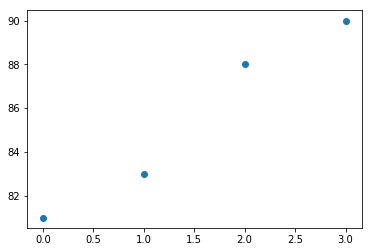

In [69]:
# on filtre sur le joueur Salah
all_data_fifa_salah = all_data_fifa_merged[all_data_fifa_merged['short_name_fifa17']=='M. Salah']
x = [0,1,2,3]
# coordonnées y correspondant aux notes générales du joueur Salah de fifa17 à fifa20
# le nombre 90 correspond à la note générale de Salah sur fifa20
y = [all_data_fifa_salah.overall_fifa17,all_data_fifa_salah.overall_fifa18,all_data_fifa_salah.overall_fifa19,90]
# on trace un nuage de points pour suivre l'évolution de la note générale de Salah
plt.scatter(x,y)
# on constate que la note de Salah a augmenté de 10 points en 4 ans ce qui est est énorme. Cela montre la superbe progression de Salah

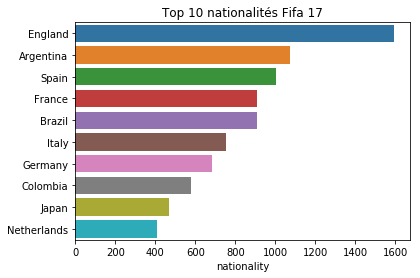

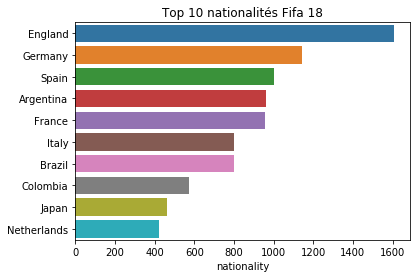

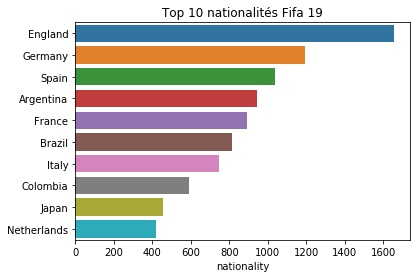

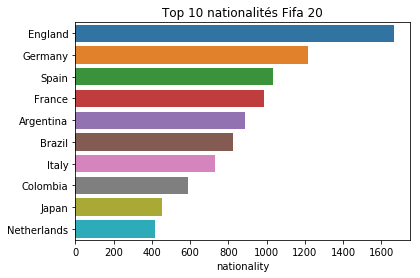

In [70]:
# affichage des 10 nationalités ou il y le plus de joueurs dans fifa 17
sns.barplot(data_fifa17["nationality"].value_counts()[:10], data_fifa17["nationality"].value_counts().index[:10])
plt.title('Top 10 nationalités Fifa 17')
plt.show();

# affichage des 10 nationalités ou il y le plus de joueurs dans fifa 18
sns.barplot(data_fifa18["nationality"].value_counts()[:10], data_fifa18["nationality"].value_counts().index[:10])
plt.title('Top 10 nationalités Fifa 18')
plt.show();

# affichage des 10 nationalités ou il y le plus de joueurs dans fifa 19
sns.barplot(data_fifa19["nationality"].value_counts()[:10], data_fifa19["nationality"].value_counts().index[:10])
plt.title('Top 10 nationalités Fifa 19')
plt.show();

# affichage des 10 nationalités ou il y le plus de joueurs dans fifa 20
sns.barplot(data_fifa20["nationality"].value_counts()[:10], data_fifa20["nationality"].value_counts().index[:10])
plt.title('Top 10 nationalités Fifa 20')
plt.show();

# on constate que c'est la nationalité anglaise qui rassemble le plus de joueurs de Fifa 17 à Fifa 20

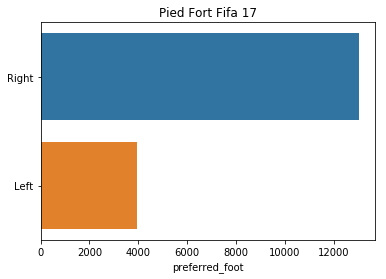

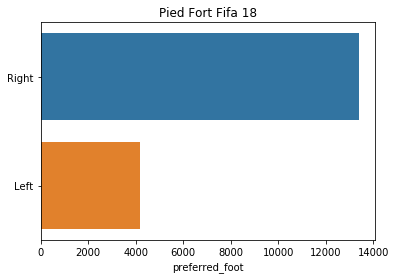

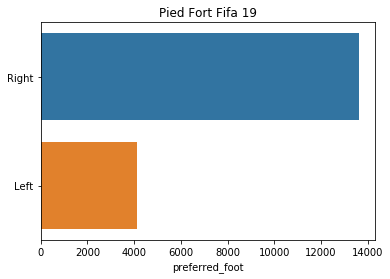

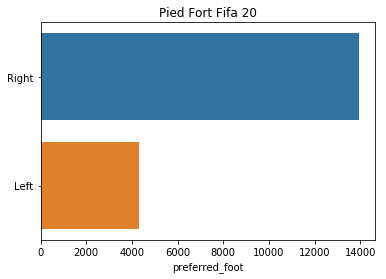

In [71]:
# affichage du pied fort des joueurs dans fifa 17
sns.barplot(data_fifa17["preferred_foot"].value_counts()[:2], data_fifa17["preferred_foot"].value_counts().index[:2])
plt.title('Pied Fort Fifa 17')
plt.show();

# affichage du pied fort des joueurs dans fifa 18
sns.barplot(data_fifa18["preferred_foot"].value_counts()[:2], data_fifa18["preferred_foot"].value_counts().index[:2])
plt.title('Pied Fort Fifa 18')
plt.show();

# affichage du pied fort des joueurs dans fifa 19
sns.barplot(data_fifa19["preferred_foot"].value_counts()[:2], data_fifa19["preferred_foot"].value_counts().index[:2])
plt.title('Pied Fort Fifa 19')
plt.show();

# affichage du pied fort des joueurs dans fifa 20
sns.barplot(data_fifa20["preferred_foot"].value_counts()[:2], data_fifa20["preferred_foot"].value_counts().index[:2])
plt.title('Pied Fort Fifa 20')
plt.show();

# on observe que les droitiers sont plus nombreux que les gauchers dans Fifa17,18,19,20

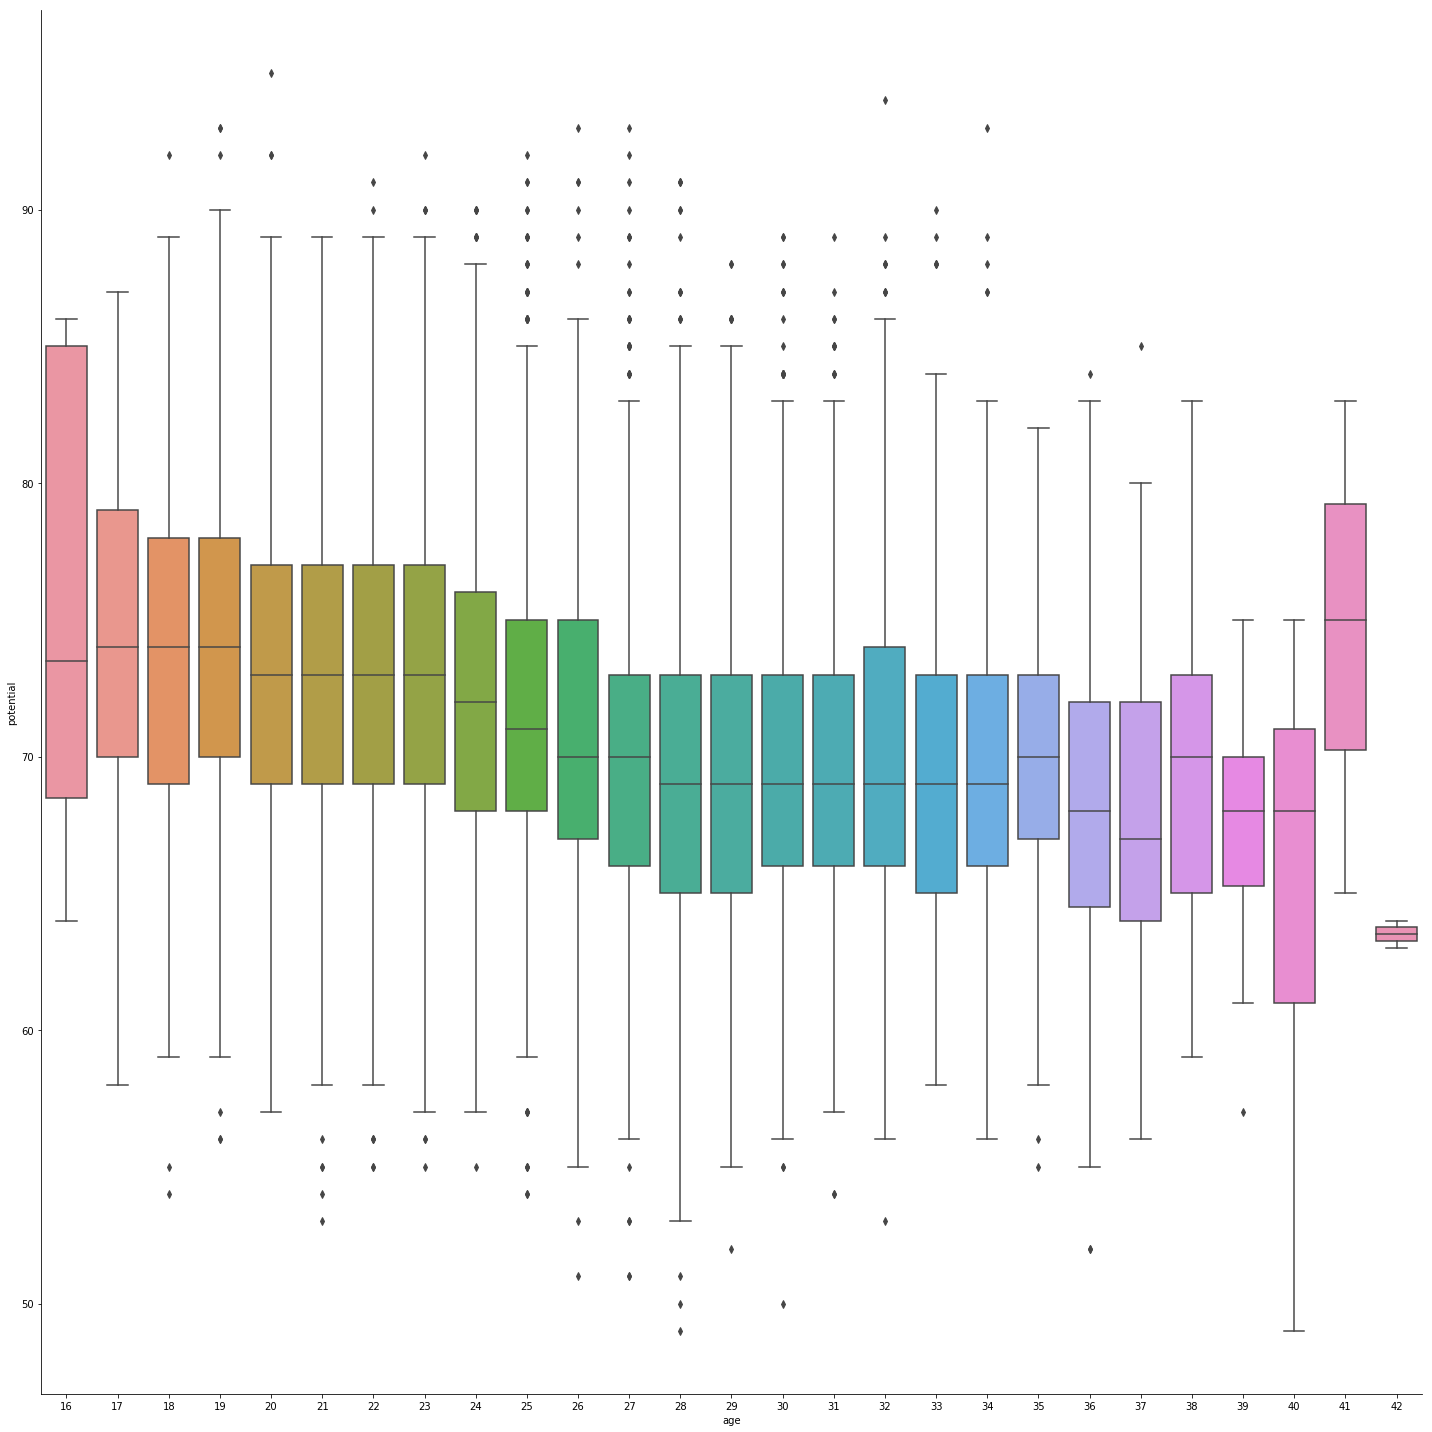

In [72]:
# on trace les boites à moustaches afin d'analyser le potentiel d'un joueur par rapport à son age
sns.catplot(x='age', y='potential', data=data_fifa20,height = 20,kind="box")
# on constate qu'en général les joueurs avec le meilleur potentiel sont agés de 16 à 19 ans et que plus le joueur se rapproche de 40, ans plus son potentiel est faible.
# Néanmoins on observe des valeurs aberrantes qui correpondent à des joueurs qui sont en dehors de la moyenne et qui disposent d'un potentiel très élevée pour leur age comme par example Mbappe

Text(0.5, 1.0, "La répartition de l'age des joueurs de Fifa 20")

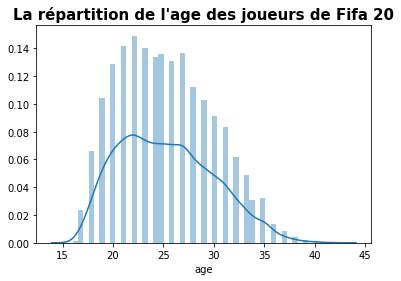

In [73]:
sns.distplot(data_fifa20.age)
plt.title("La répartition de l'age des joueurs de Fifa 20", fontsize=15, fontweight='bold')
# On constate qu la majorité des joueurs ont entre 20 et 30 ans

Text(0.5, 1.0, 'La liaison entre le tir et la finition')

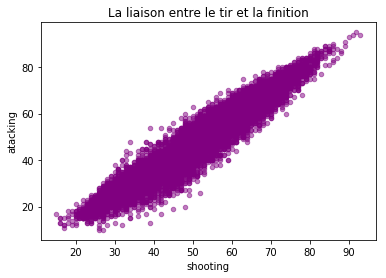

In [74]:
# on trace le nuage de points entre le tir et la finition
data_fifa20.plot(kind='scatter', x='shooting', y='attacking_finishing',alpha = 0.5,color = 'purple')
plt.xlabel('shooting')            
plt.ylabel('atacking')
plt.title('La liaison entre le tir et la finition') 
# On constate que plus on un bon tir plus on a une meilleure finition => ainsi ses 2 valeurs sont dépendantes l'une de l'autre

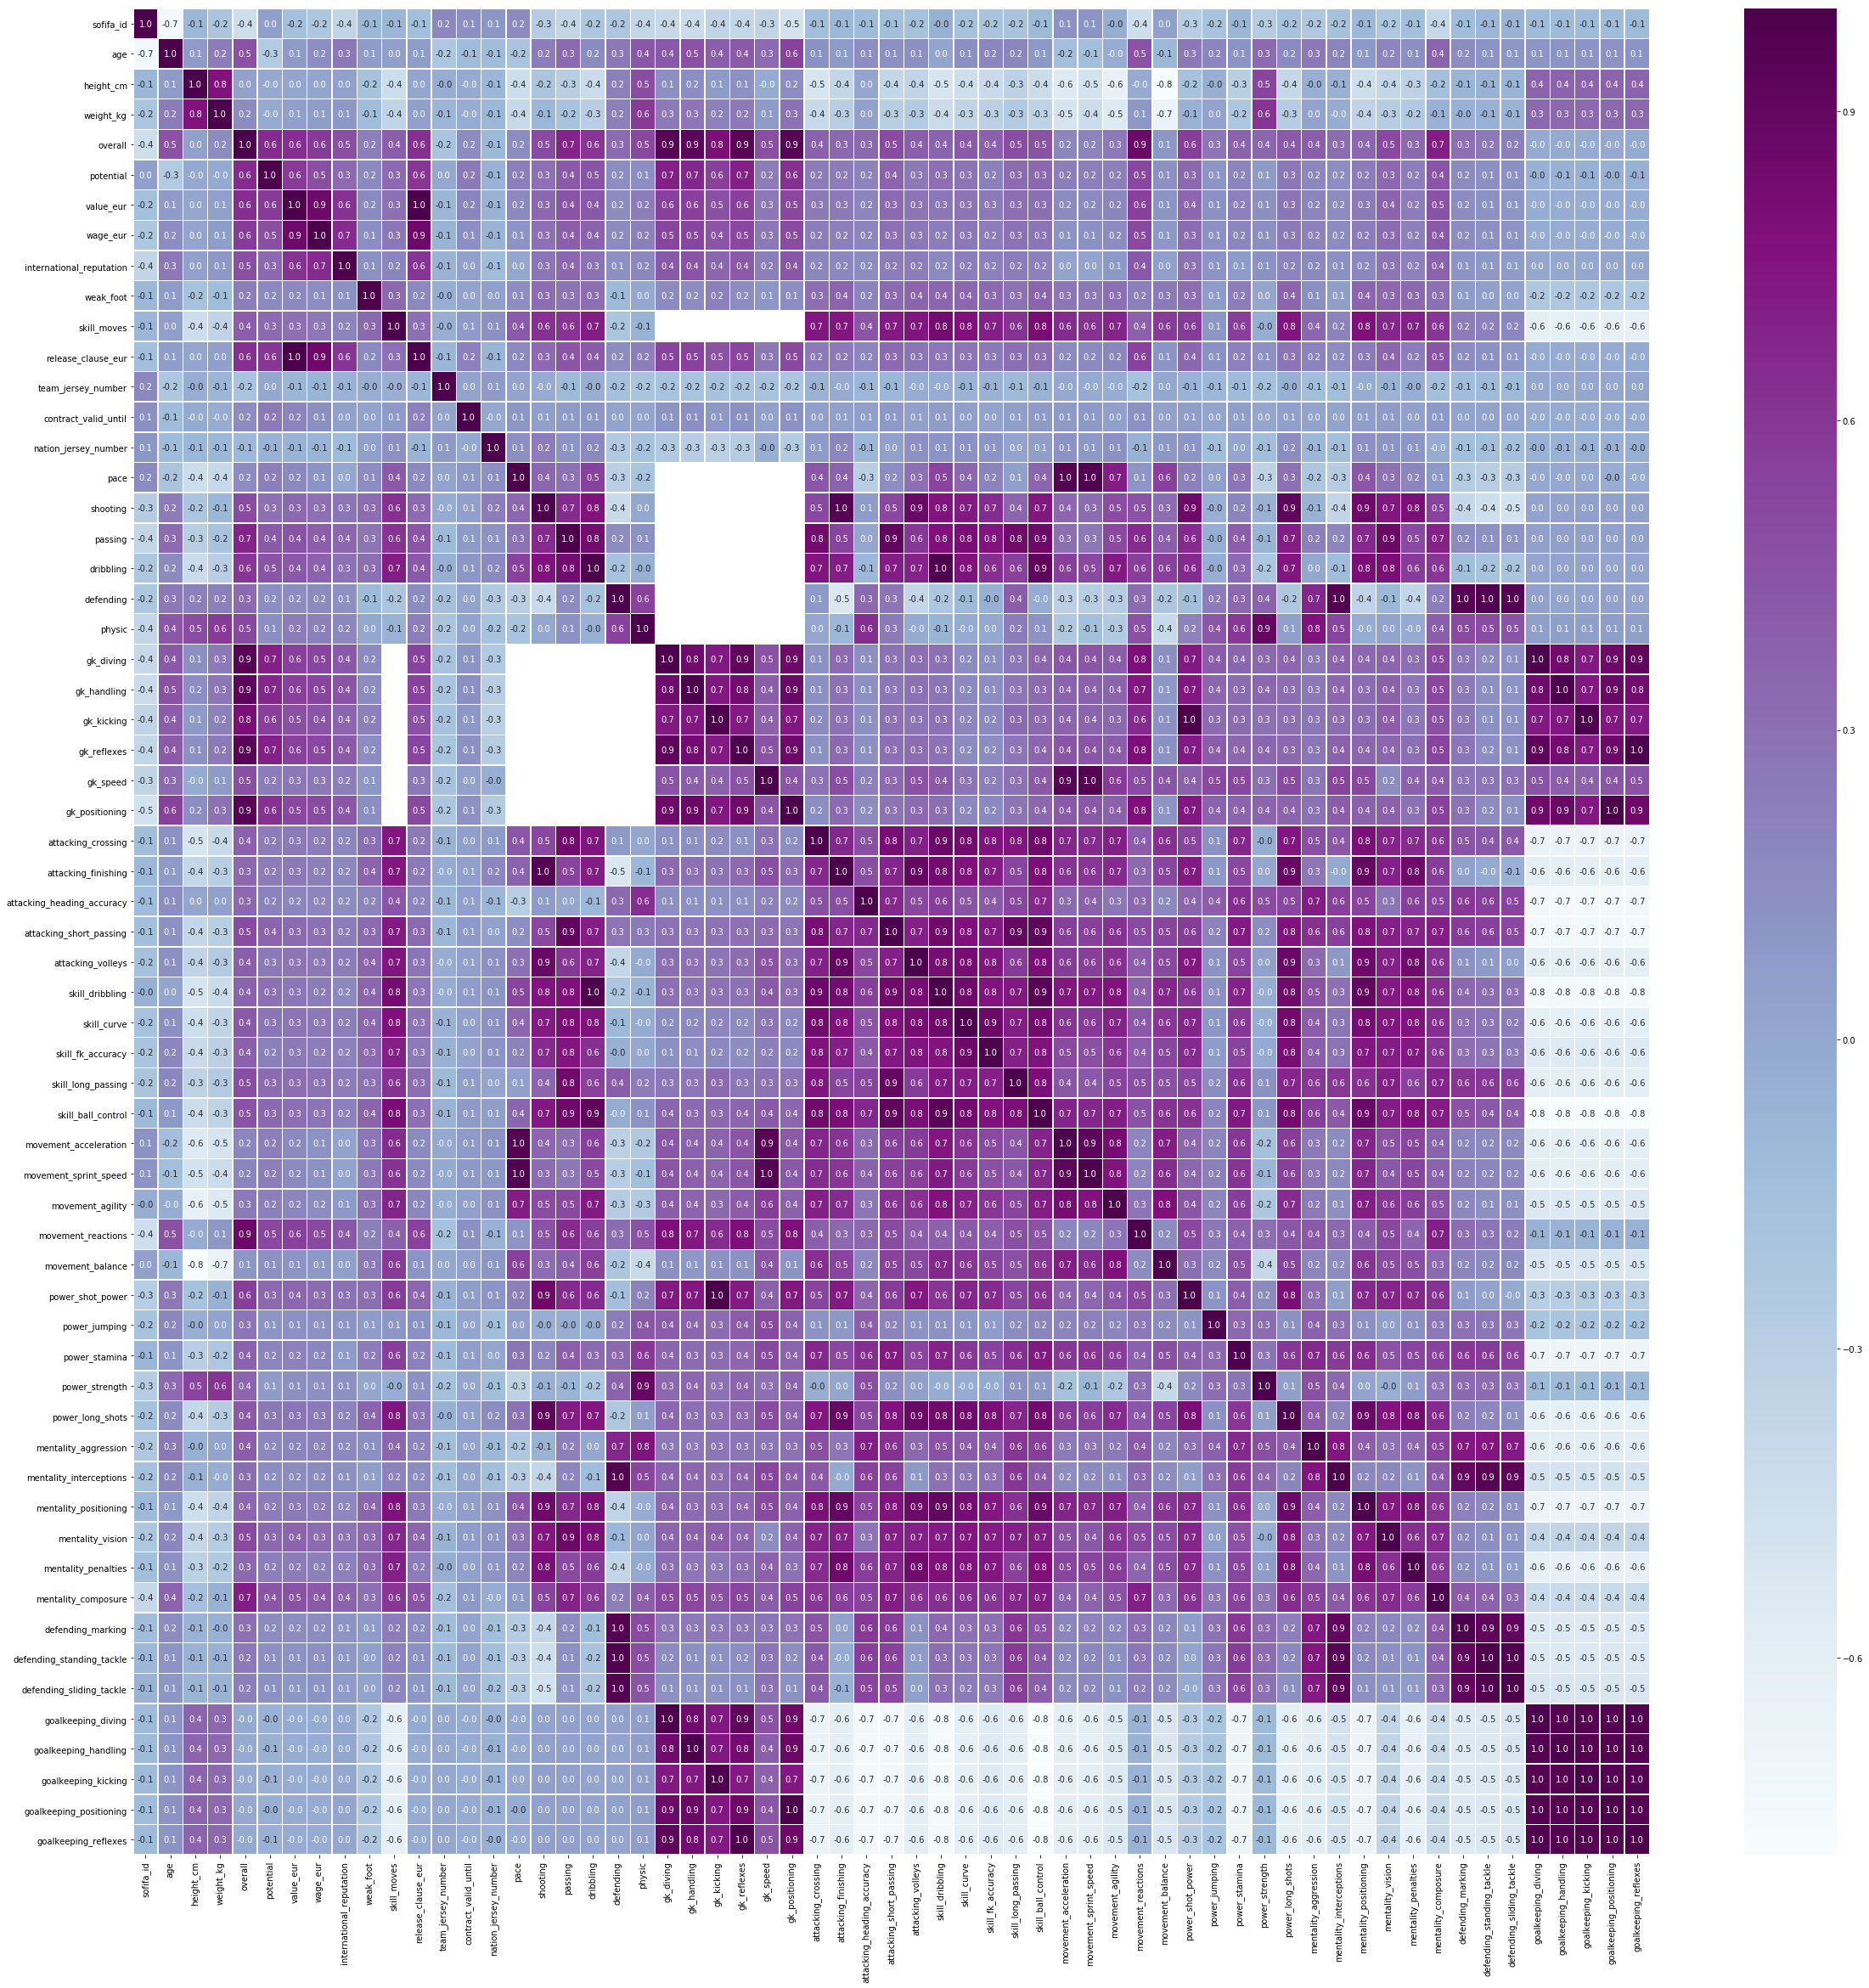

In [75]:
#Correlation de tous les attributs
f,ax = plt.subplots(figsize = (40,40))
sns.heatmap(data_fifa20.corr(),annot = True,linewidths=.5,fmt = '.1f',ax=ax, cmap="BuPu")
plt.show()

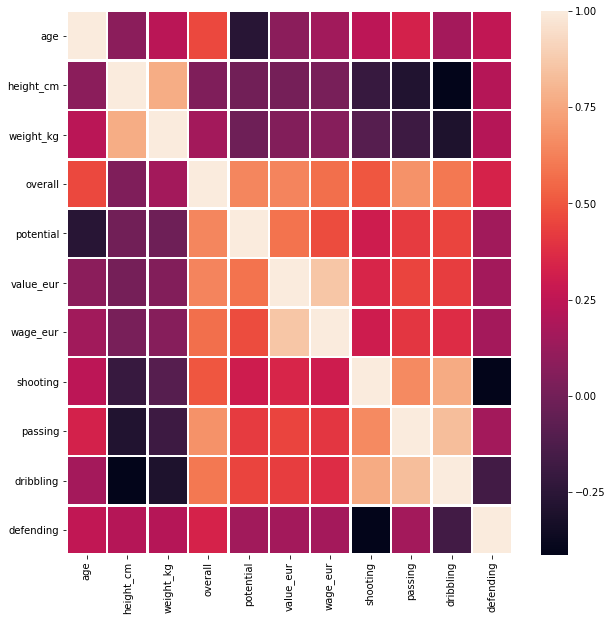

In [76]:
# on sélectionne les attributs qu'on souhaite analyser 
data = data_fifa20[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','shooting','passing','dribbling','defending']]

# Création d'une matrice de corrélation
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data.corr(),linewidths=1.5,ax=ax)

# Dans cette matrice de correlation on observe que le overall et le potential ont un indicateur de corrélation proche de 1. 
# Pareil pour pour les colonnes wage_eur et overall, ce qui est logique car plus un joueur a du potentiel plus il vaut cher
# On a aussi un indicateur de corrélation proche de 1 entre le dribble et la note du joueur c'est à dire  que plus le joueur aura une bonne statistique en drible plus sa note sera élèvée à l'image de Neymar ou Messi par exemple

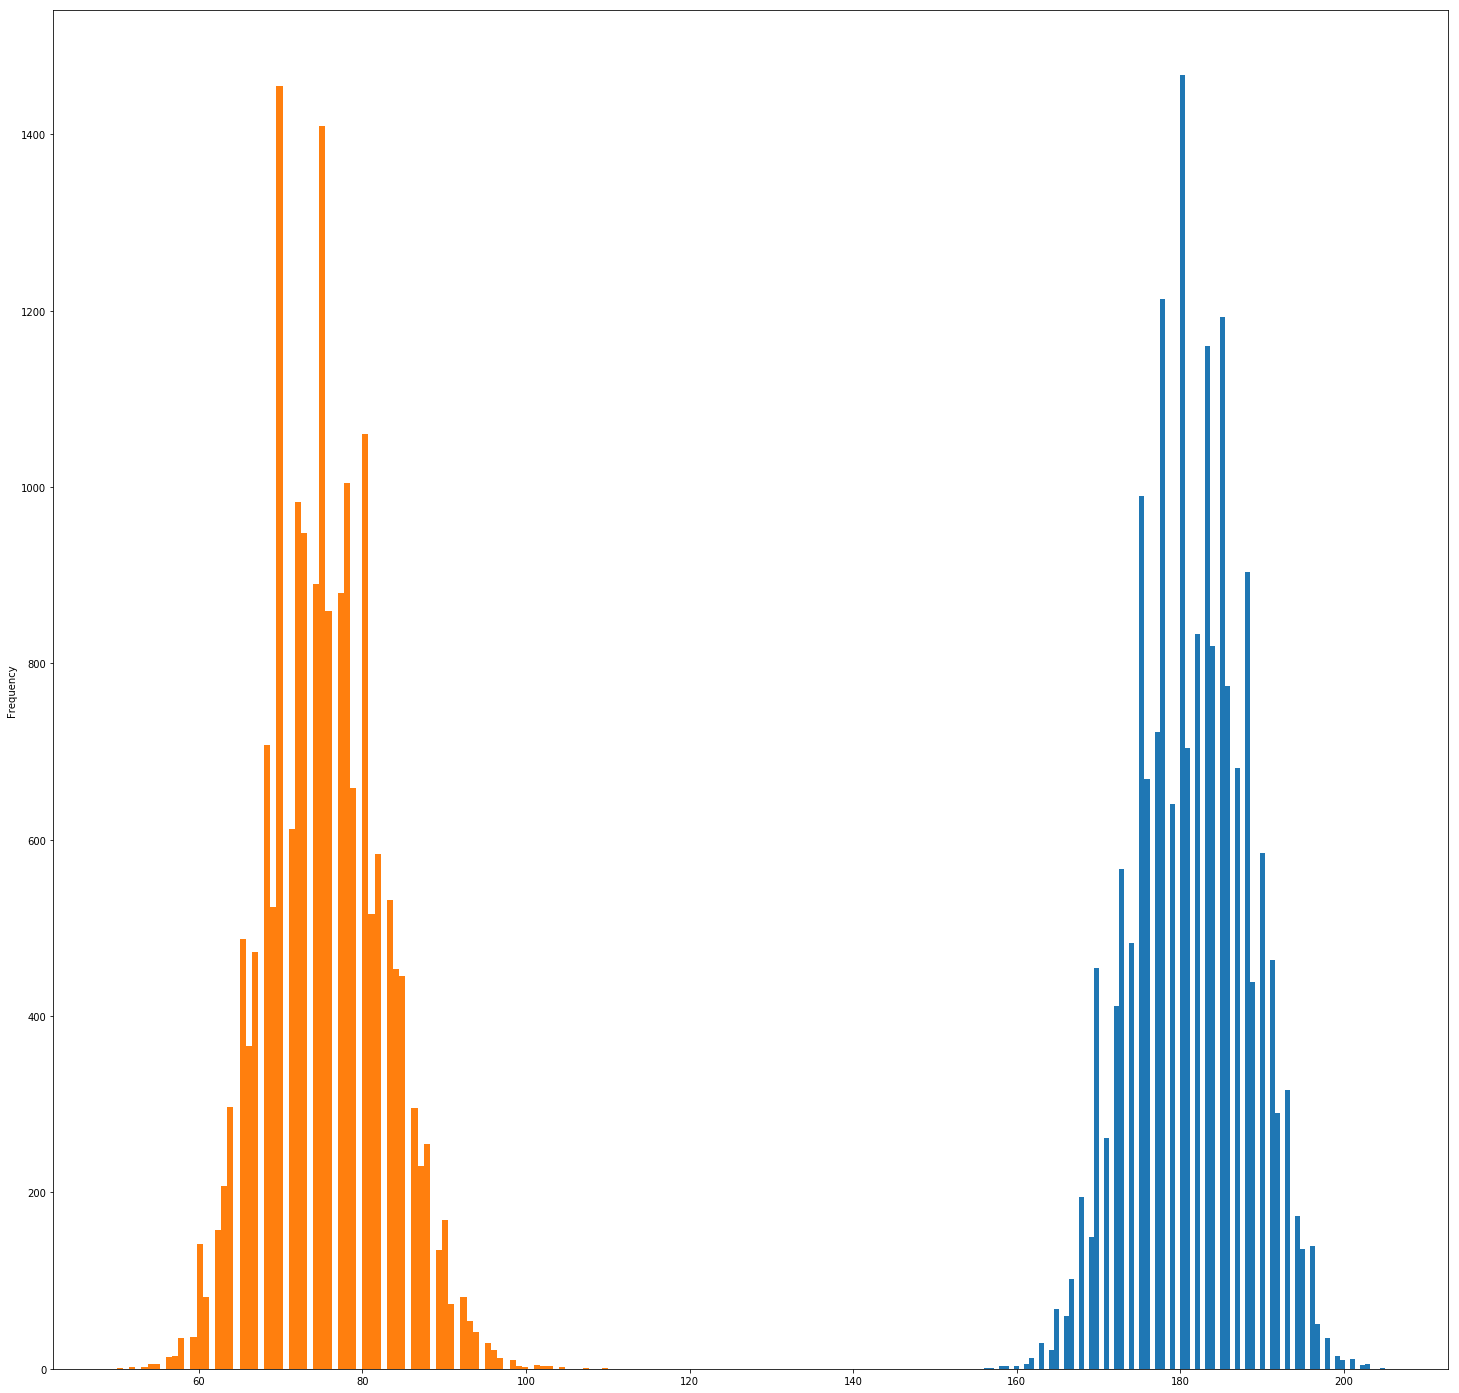

In [77]:
# on trace deux histogrammes afin d'analyser le poids et la taille moyenne des joueurs
data.height_cm.plot(kind = 'hist',bins = 80,figsize = (25,25))
data.weight_kg.plot(kind = 'hist',bins = 80,figsize = (25,25))
# on constate donc qu'en moyenne les joueurs pèsent entre 70 et 80 kg et qu'ils mesurent 180 cm

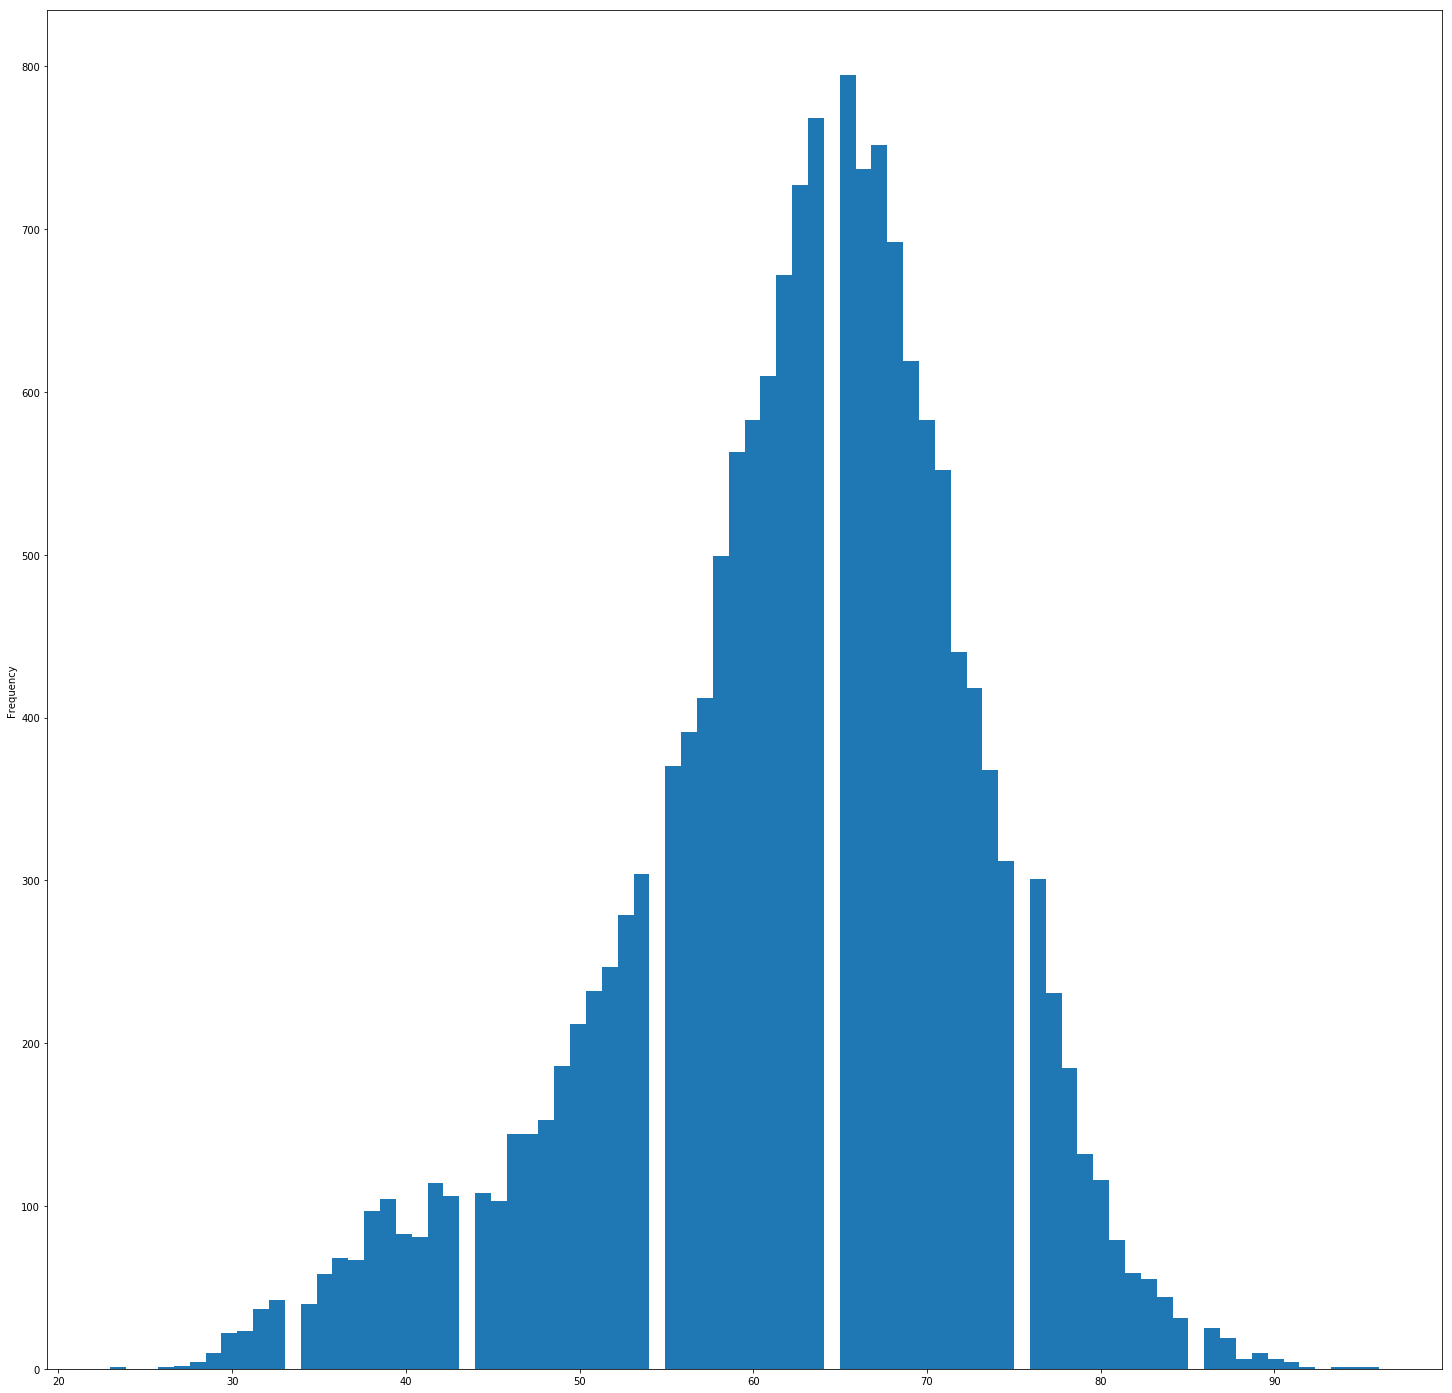

In [78]:
# on trace un histogramme afin d'analyser la statistique de dribbles
data.dribbling.plot(kind = 'hist',bins = 80,figsize = (25,25))
# La statistique moyenne de dribbles est entre 60 et 70

In [79]:
# on filtre les attributs à analyser 
data_all_overall= all_data_fifa_merged[['overall_fifa17','overall_fifa18','overall_fifa19','overall_fifa20','short_name_fifa17','short_name_fifa20']]
# on sélectionne les 10 meilleurs joueurs en triant par overall (note globale)
data_top_10_joueurs_fifa17_18_19_20=data_all_overall.sort_index(ascending=True).head(10)
data_top_10_joueurs_fifa17_18_19_20


,overall_fifa17,overall_fifa18,overall_fifa19,overall_fifa20,short_name_fifa17,short_name_fifa20
0,94,94,94,93,Cristiano Ronaldo,Cristiano Ronaldo
1,93,93,94,94,L. Messi,L. Messi
2,92,92,92,92,Neymar,Neymar Jr
3,92,92,90,88,M. Neuer,M. Neuer
4,92,92,91,89,L. Suárez,L. Suárez
5,90,90,91,89,De Gea,De Gea
6,90,88,85,85,Z. Ibrahimović,Z. Ibrahimović
7,90,89,88,85,G. Bale,G. Bale
8,90,88,86,84,J. Boateng,J. Boateng
9,90,91,90,89,R. Lewandowski,R. Lewandowski


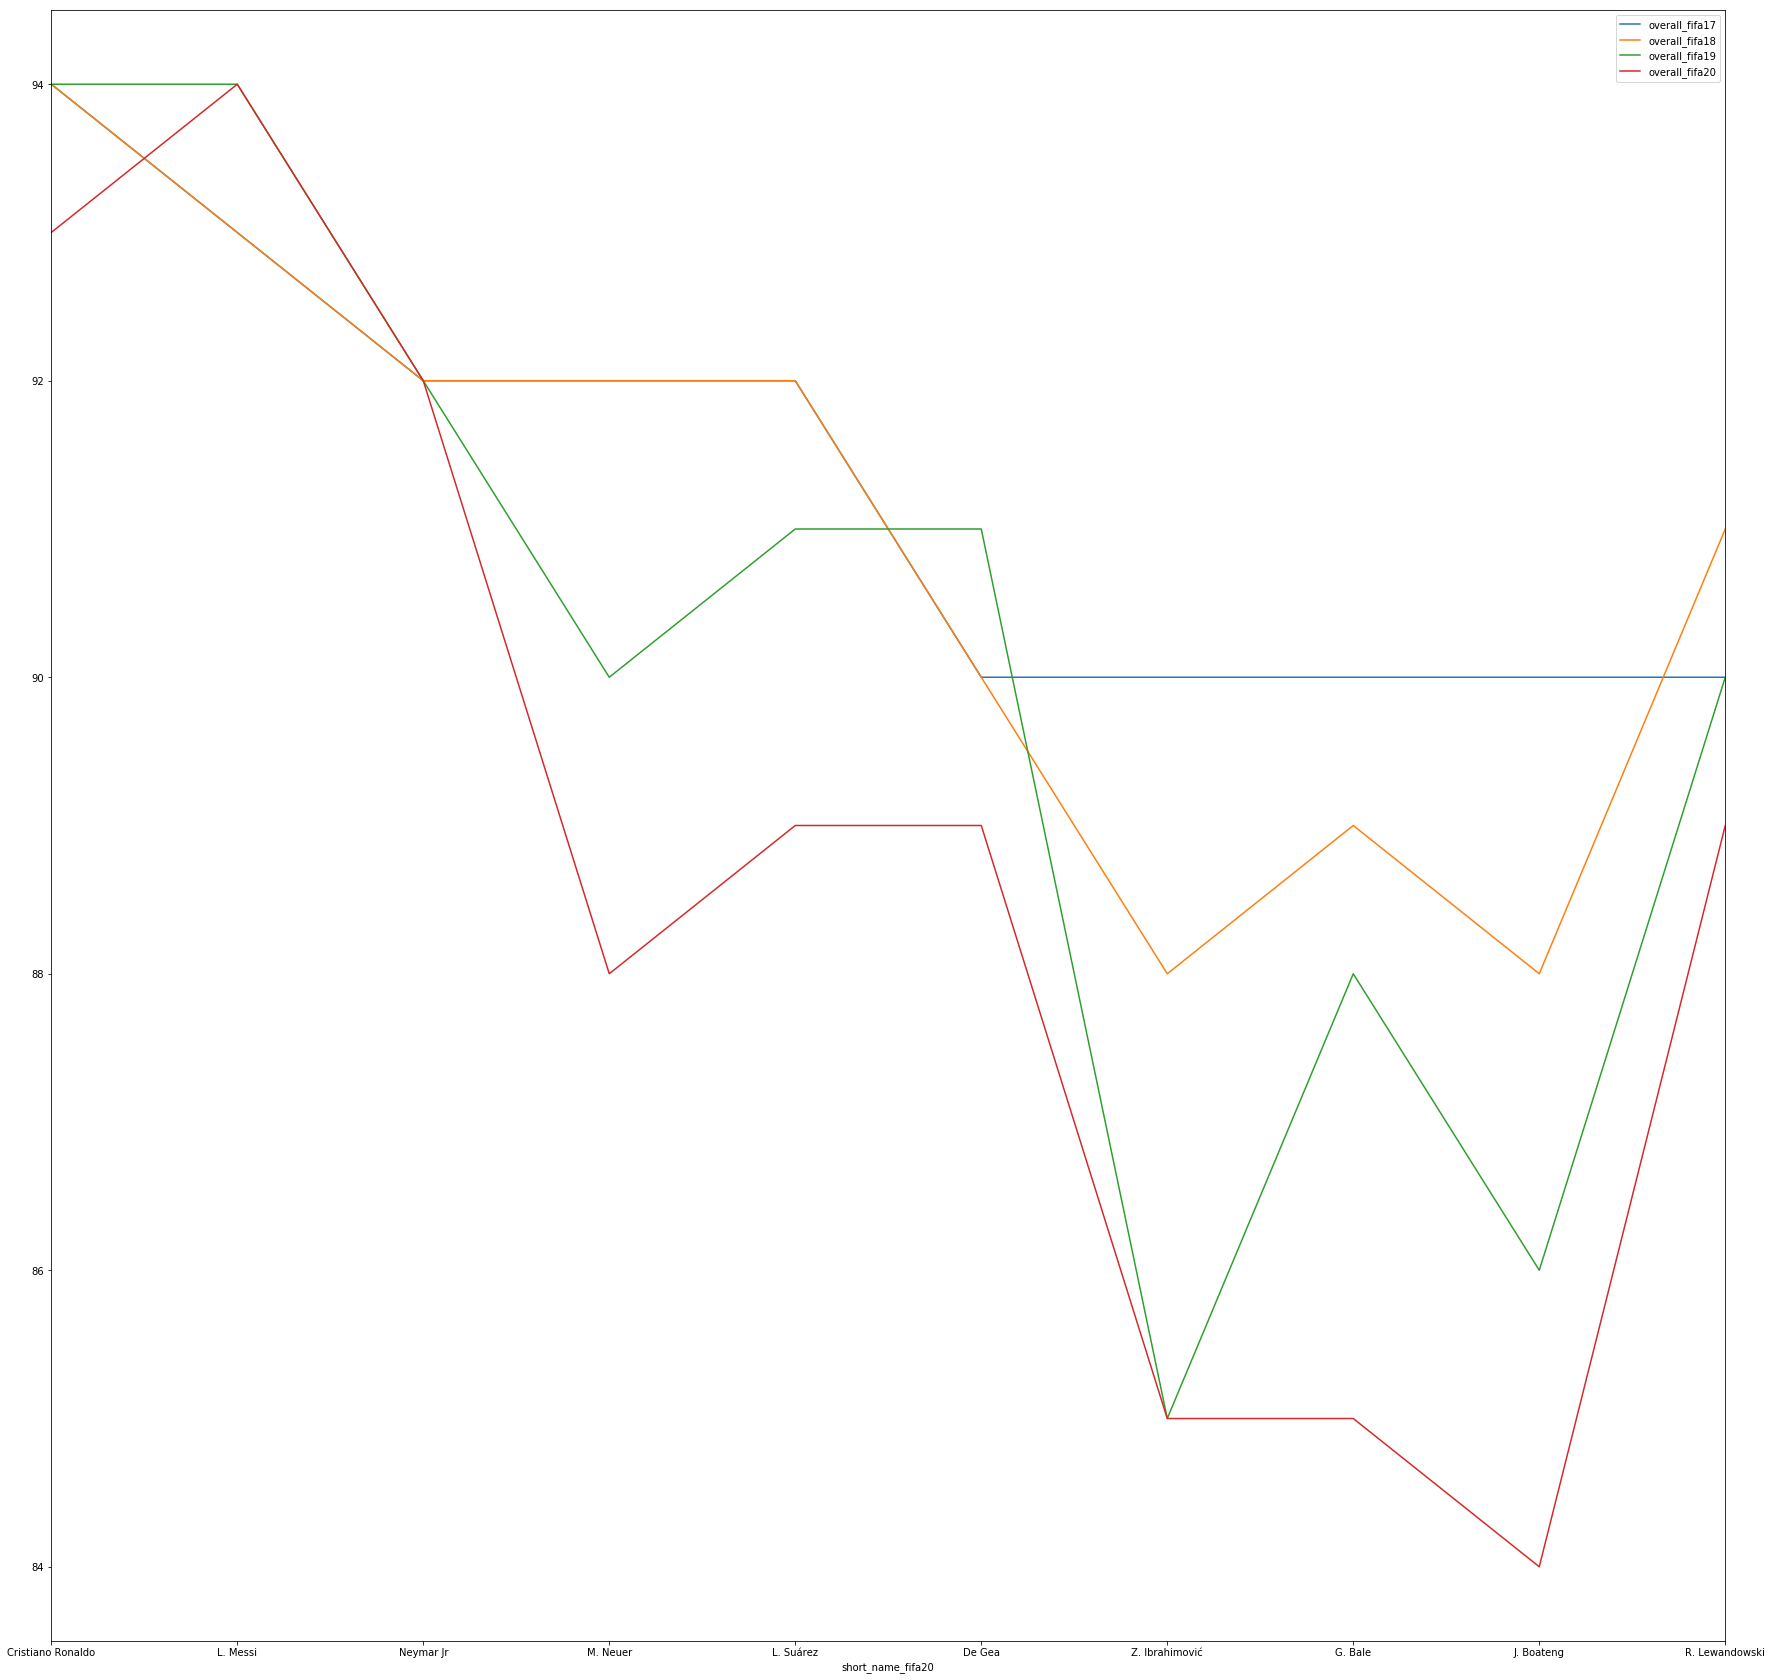

In [80]:
# on trace 4 courbes d'évolution de la note globale pour chaque joueur présent sur l'axe des abscisses
data_top_10_joueurs_fifa17_18_19_20.plot(kind='line', x='short_name_fifa20', y=['overall_fifa17','overall_fifa18','overall_fifa19','overall_fifa20'],figsize=(30,30))
# on observe ici pour chaque joueur du top 10 l'évolution de sa note globale avec 4 courbes qui representent FIFA 17,18,19,20. 
# Il faut lire pour chaque abscisse (nom du joueur) les 4 courbes en lisant verticalement
# On voit que Messi et Ronaldo sont restés constants dans leurs notes tandis que la note de Boateng n'a cessé de diminuer

Text(0.5, 1.0, 'Répartition des nationalités dans Fifa 17')

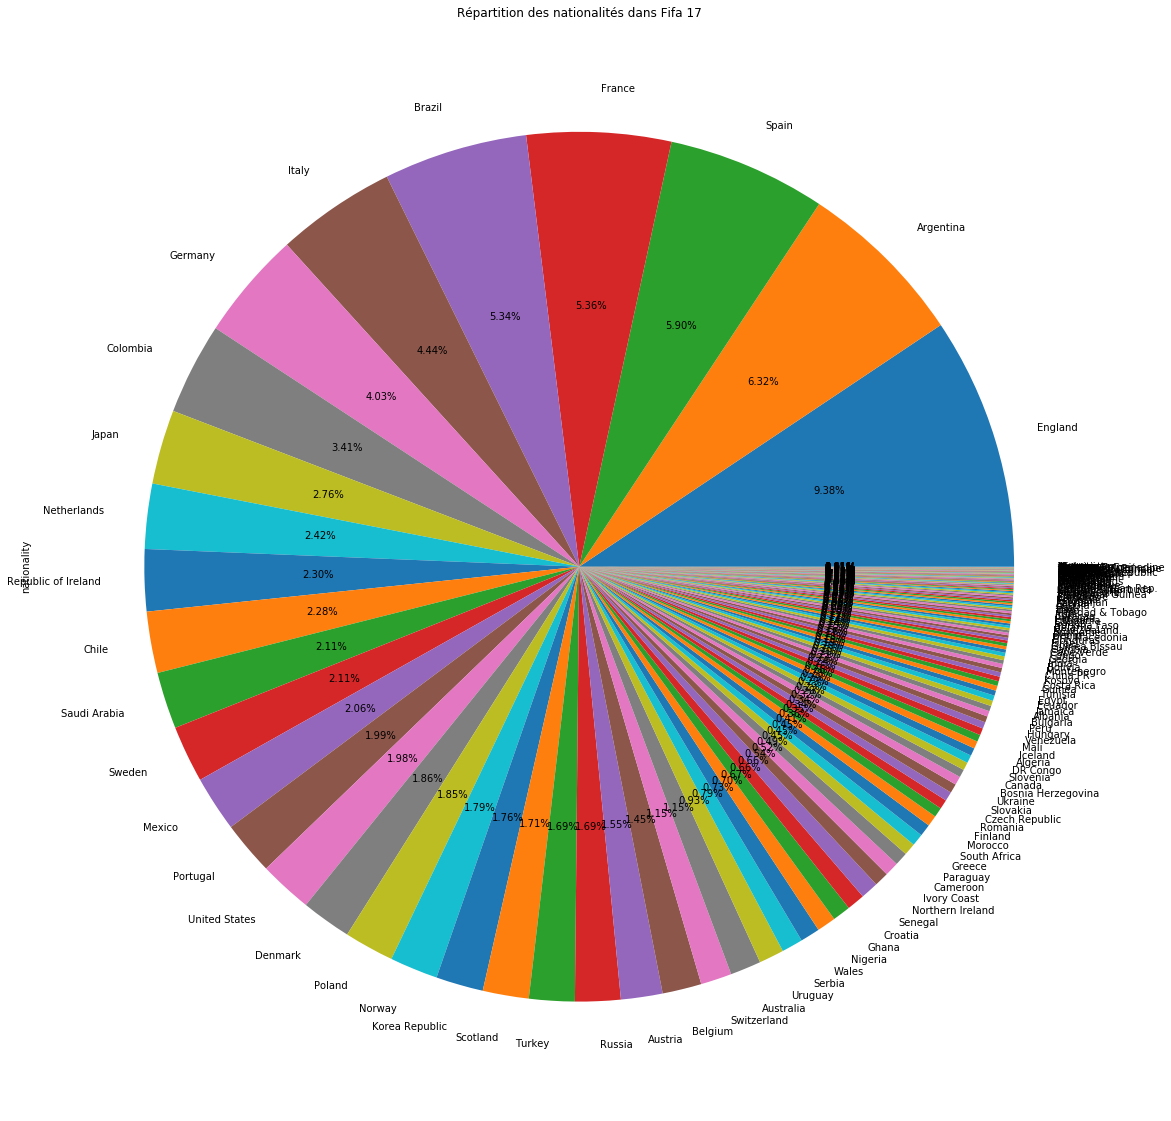

In [81]:
# on trace le diagramme de Pie pour analyser les nationalités où il y a le plus de joueurs de football pour Fifa 17
data_fifa17['nationality'].value_counts(normalize=True).plot(kind='pie',figsize=(20,20),autopct='%.2f%%')
# Top 3 : Angleterre, Argentine, Espagne
plt.title('Répartition des nationalités dans Fifa 17')

Text(0.5, 1.0, 'Répartition des nationalites dans Fifa 18')

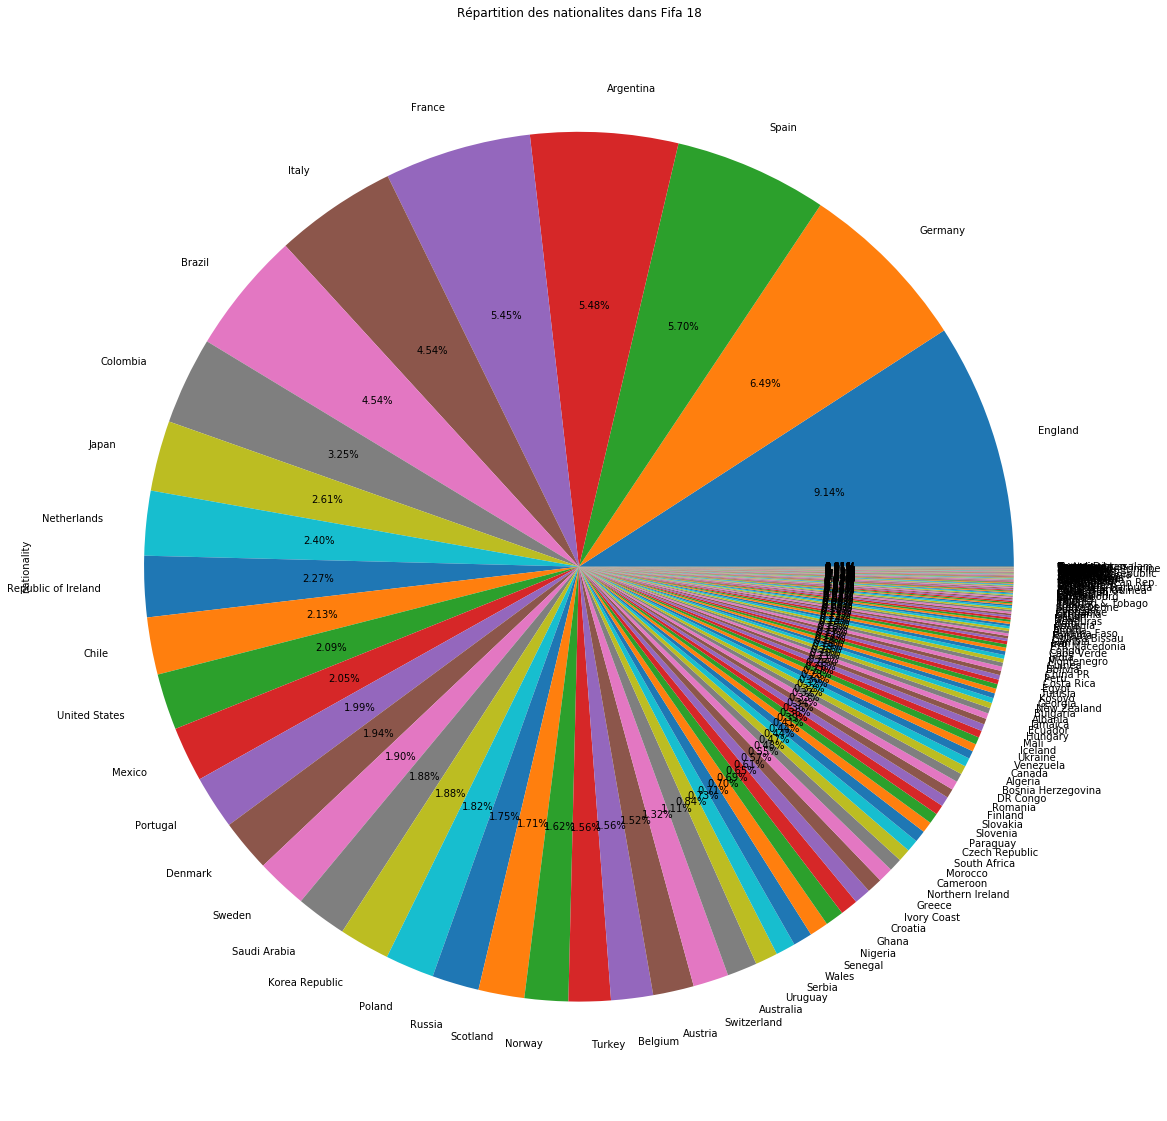

In [82]:
# on trace le diagramme de Pie pour analyser les nationalités ou il y a le plus de joueurs de football pour Fifa 18
data_fifa18['nationality'].value_counts(normalize=True).plot(kind='pie',figsize=(20,20),autopct='%.2f%%')
plt.title('Répartition des nationalites dans Fifa 18')
# Top 3 : Angleterre, Allemagne, Espagne
# On voit que L'allemagne est passé de la 7eme place à la 2eme place entre 2017 et 2018 

Text(0.5, 1.0, 'Répartition des nationalites dans Fifa 19')

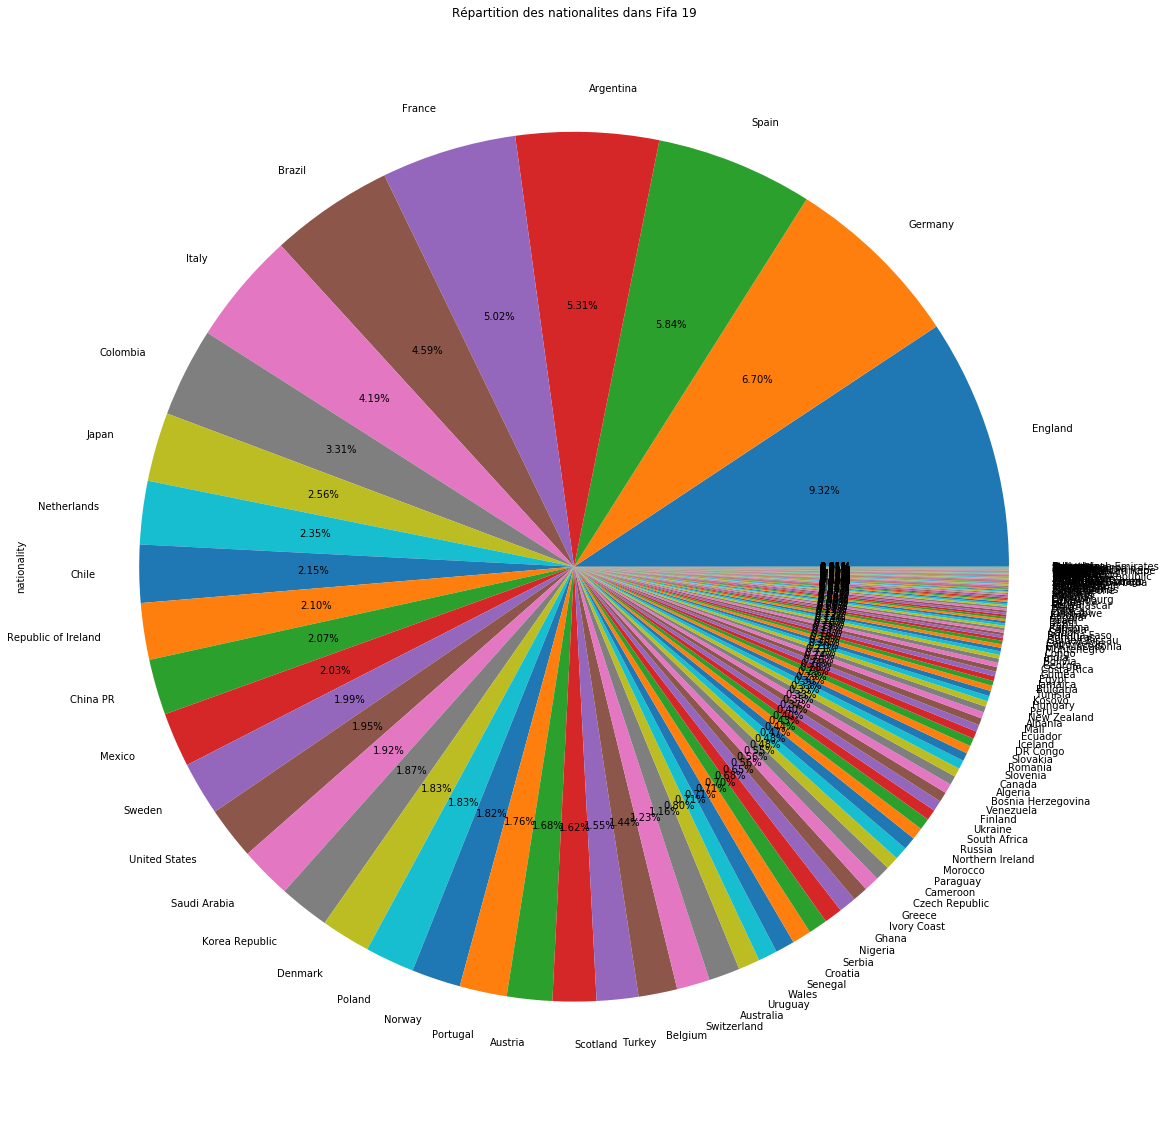

In [83]:
# on trace le diagramme de Pie pour analyser les nationalités ou il y a le plus de joueurs de football pour Fifa 19
data_fifa19['nationality'].value_counts(normalize=True).plot(kind='pie',figsize=(20,20),autopct='%.2f%%')
plt.title('Répartition des nationalites dans Fifa 19')
# Top 3 : Angleterre, Allemagne, Espagne

Text(0.5, 1.0, 'Répartition des nationalites dans Fifa 20')

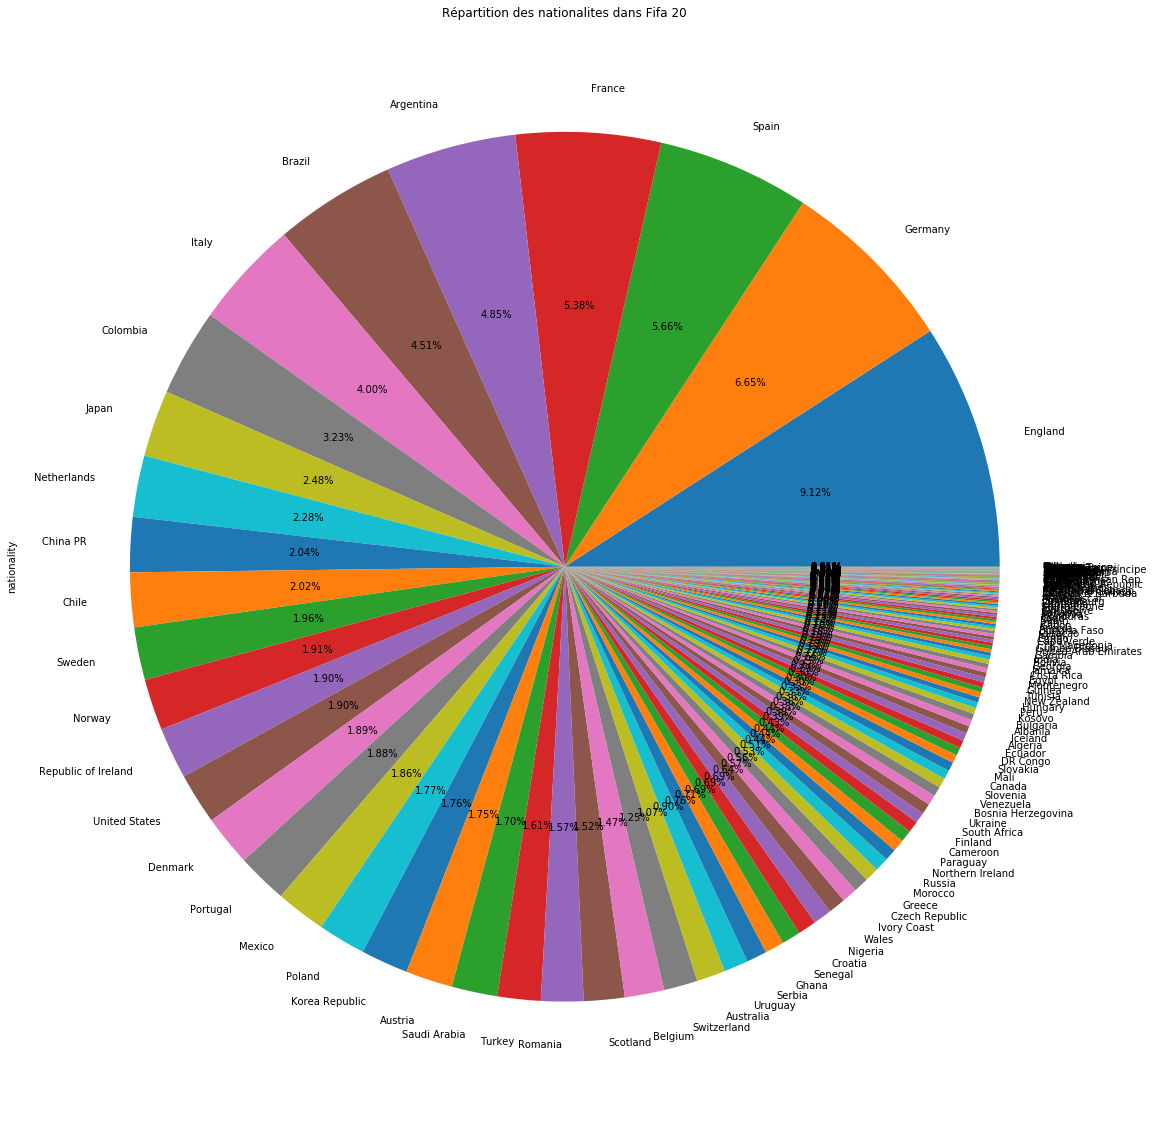

In [84]:
# on trace le diagramme de Pie pour analyser les nationalités ou il y a le plus de joueurs de football 
data_fifa20['nationality'].value_counts(normalize=True).plot(kind='pie',figsize=(20,20),autopct='%.2f%%')
plt.title('Répartition des nationalites dans Fifa 20')
# On observe ainsi que le Top 5 des nationalités où il y a le plus de joueurs est ::
# 1) Angleterre avec (9%)
# 2) Allemagne avec (6,7%)
# 3) Allemagne avec (6,7%)
# 4) Espagne avec (5,7%)
# 5) France avec (5,4%)

